In [1]:
import warnings  # noqa
warnings.filterwarnings('ignore')  # noqa

import numpy as np
from numpy import testing
import matplotlib.pyplot as plt
import torch
import os
import yaml
from pathlib import Path
import xarray as xr
import csv
import json
import unittest

import ili
from ili.dataloaders import (
    NumpyLoader, SBISimulator, StaticNumpyLoader, SummarizerDatasetLoader,
    TorchLoader)
from ili.inference import (
    SBIRunner, SBIRunnerSequential, ABCRunner, InferenceRunner)
from ili.validation.metrics import (
    PlotSinglePosterior, PosteriorCoverage, PosteriorSamples)
from ili.validation.runner import ValidationRunner
from ili.embedding import FCN
from ili.utils import load_nde_sbi

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device:', device)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Device: cpu


In [2]:
from test_sbi_module import *

Device: cpu


INFO:root:MODEL INFERENCE CLASS: SNPE_C
INFO:root:The first round of inference will use existing sims from the loader. Make sure that the simulations were run from the given proposal distribution for consistency.
INFO:root:Running round 1 / 2
INFO:root:Training model 1 / 2.
INFO:root:Training model 2 / 2.


 Neural network successfully converged after 21 epochs.

Drawing 10 posterior samples:   0%|          | 0/10 [00:00<?, ?it/s]

Running 10 simulations.:   0%|          | 0/10 [00:00<?, ?it/s]

INFO:root:Running round 2 / 2
INFO:root:Training model 1 / 2.


Using SNPE-C with atomic loss
 Training neural network. Epochs trained: 7

 Training neural network. Epochs trained: 14

 Neural network successfully converged after 21 epochs.

INFO:root:Training model 2 / 2.


Using SNPE-C with atomic loss
 Training neural network. Epochs trained: 9

 Training neural network. Epochs trained: 19

 Training neural network. Epochs trained: 27

 Training neural network. Epochs trained: 34

 Training neural network. Epochs trained: 42

 Training neural network. Epochs trained: 50

INFO:root:It took 1.882939100265503 seconds to train models.
INFO:root:Saving model to toy
INFO:root:Number of posteriors in the ensemble is 2
INFO:root:Metrics are computed for each posterior in the ensemble.
INFO:root:Running metric PosteriorCoverage.


 Neural network successfully converged after 55 epochs.<class 'sbi.inference.posteriors.direct_posterior.DirectPosterior'>



INFO:root:Saving coverage plot to toy/_plot_coverage.jpg...
INFO:root:Saving ranks histogram to toy/_ranks_histogram.jpg...

INFO:root:Running metric PosteriorSamples.
███████████████████████████████████████| 100/100 [00:00<00:00, 5309.72it/s]

<class 'sbi.inference.posteriors.direct_posterior.DirectPosterior'>



INFO:root:Saving posterior samples to toy/_posterior_samples.npy...
INFO:root:Running metric PlotSinglePosterior.
t/s]

<class 'sbi.inference.posteriors.direct_posterior.DirectPosterior'>


Drawing 2 posterior samples:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:root:Saving single posterior plot to toy/_plot_single_posterior.jpg...
INFO:root:Running metric PosteriorCoverage.


<class 'sbi.inference.posteriors.direct_posterior.DirectPosterior'>



INFO:root:Saving coverage plot to toy/_plot_coverage.jpg...
INFO:root:Saving ranks histogram to toy/_ranks_histogram.jpg...

INFO:root:Running metric PosteriorSamples.
███████████████████████████████████████| 100/100 [00:00<00:00, 5552.65it/s]

<class 'sbi.inference.posteriors.direct_posterior.DirectPosterior'>



INFO:root:Saving posterior samples to toy/_posterior_samples.npy...
INFO:root:Running metric PlotSinglePosterior.
/it]

<class 'sbi.inference.posteriors.direct_posterior.DirectPosterior'>


Drawing 2 posterior samples:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:root:Saving single posterior plot to toy/_plot_single_posterior.jpg...
INFO:root:It took 94.59951114654541 seconds to run all metrics.
INFO:root:Number of posteriors in the ensemble is 2
INFO:root:Metrics are computed for each posterior in the ensemble.
INFO:root:Running metric PosteriorSamples.


<class 'sbi.inference.posteriors.direct_posterior.DirectPosterior'>



INFO:root:Saving posterior samples to toy/_posterior_samples.npy...
INFO:root:Running metric PosteriorSamples.
36s/it]

<class 'sbi.inference.posteriors.direct_posterior.DirectPosterior'>



INFO:root:Saving posterior samples to toy/_posterior_samples.npy...
INFO:root:It took 16.44368863105774 seconds to run all metrics.
INFO:root:Number of posteriors in the ensemble is 2
INFO:root:Metrics are computed for each posterior in the ensemble.
INFO:root:Running metric PosteriorSamples.


<class 'sbi.inference.posteriors.direct_posterior.DirectPosterior'>



INFO:root:Saving posterior samples to toy/_posterior_samples.npy...
INFO:root:Running metric PosteriorSamples.
88it/s]

<class 'sbi.inference.posteriors.direct_posterior.DirectPosterior'>



INFO:root:Saving posterior samples to toy/_posterior_samples.npy...
INFO:root:It took 2.031183958053589 seconds to run all metrics.


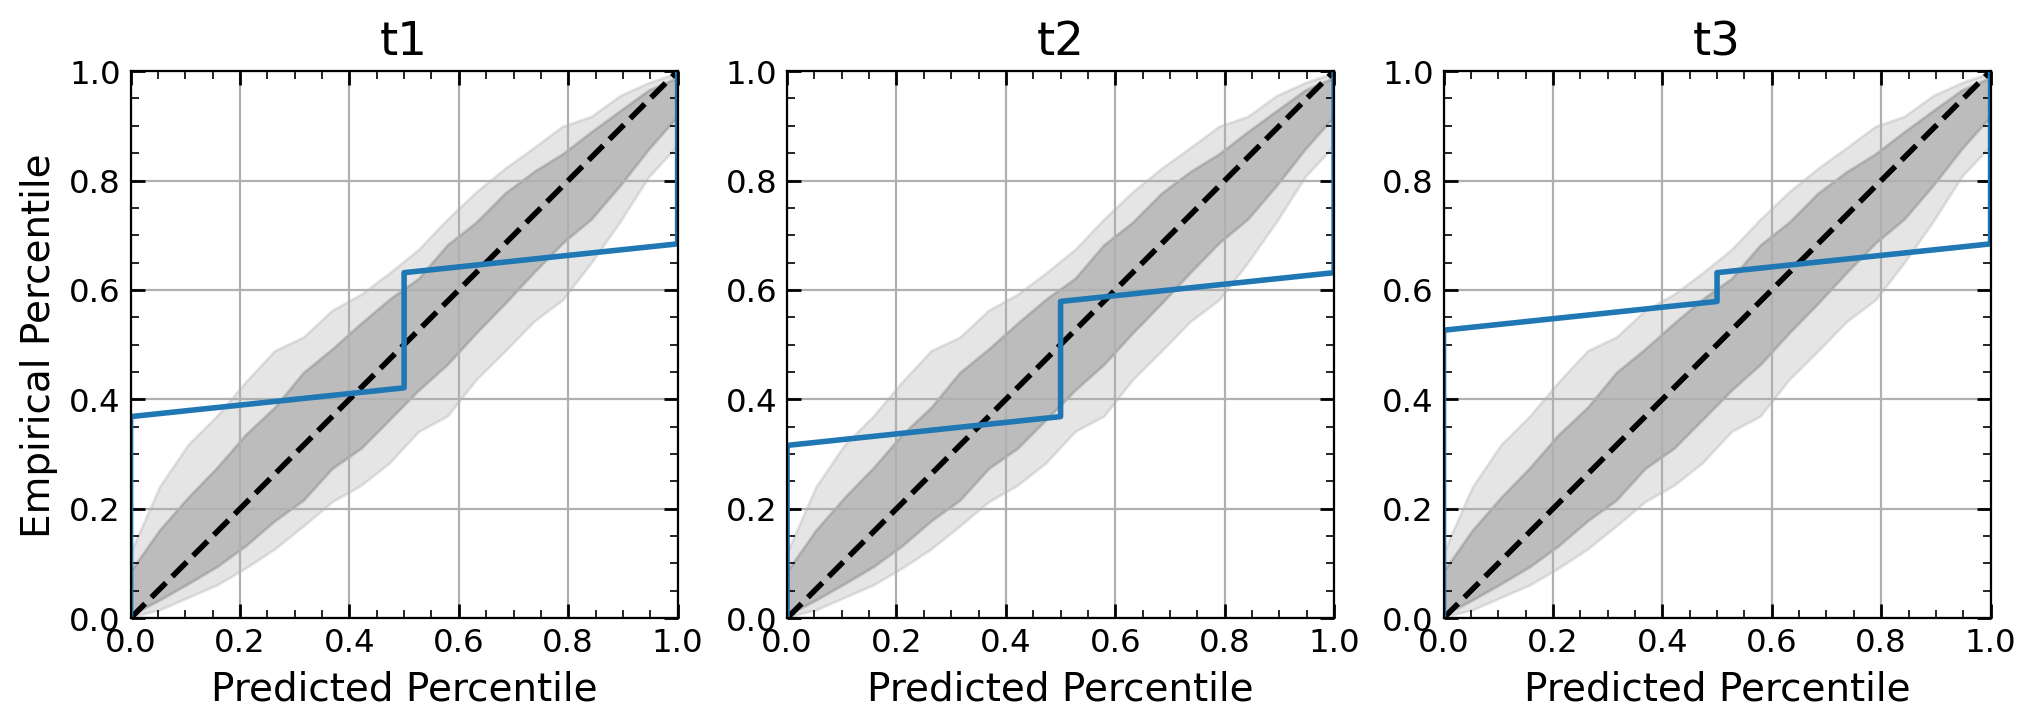

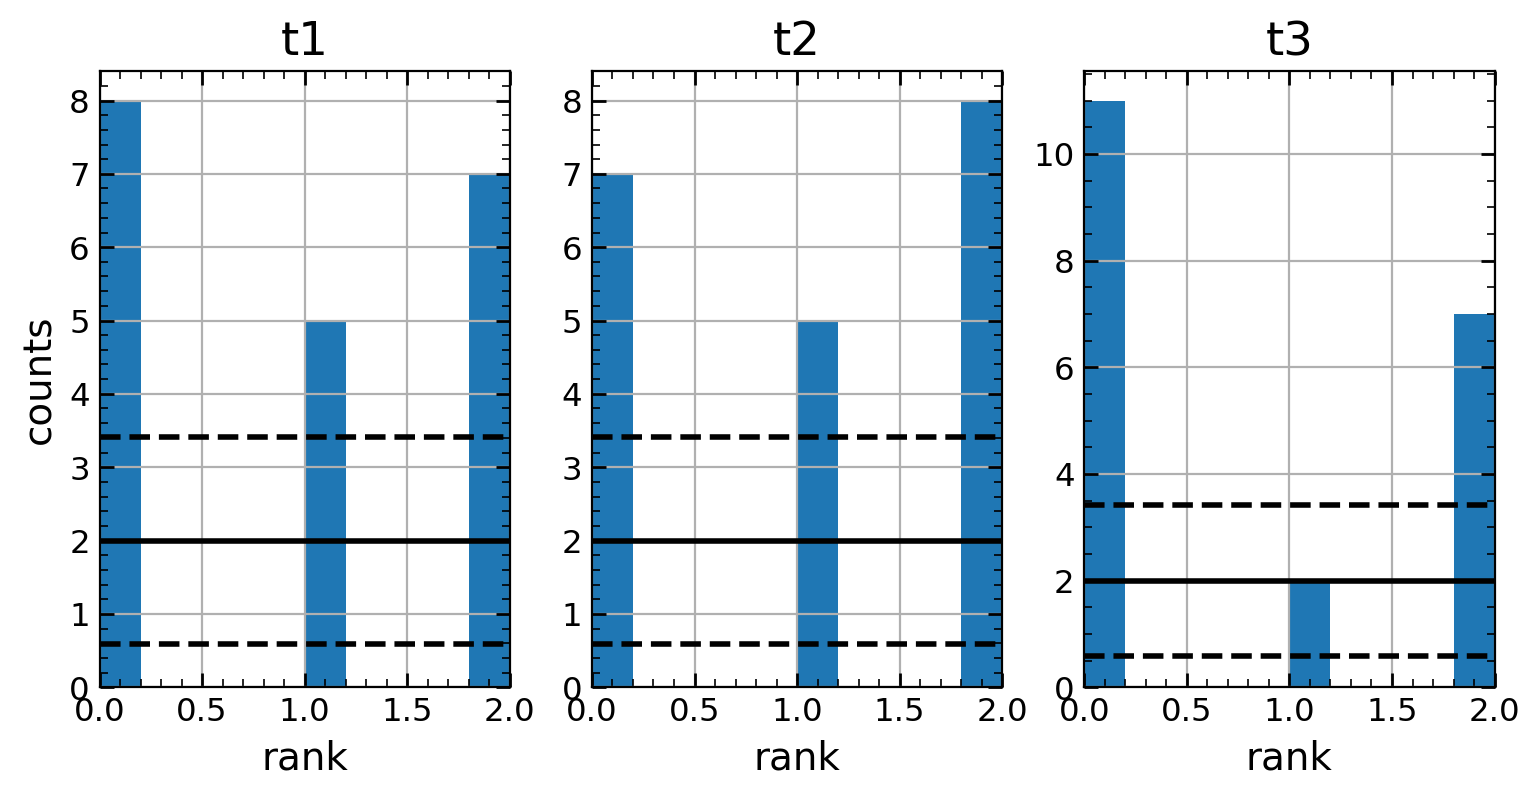

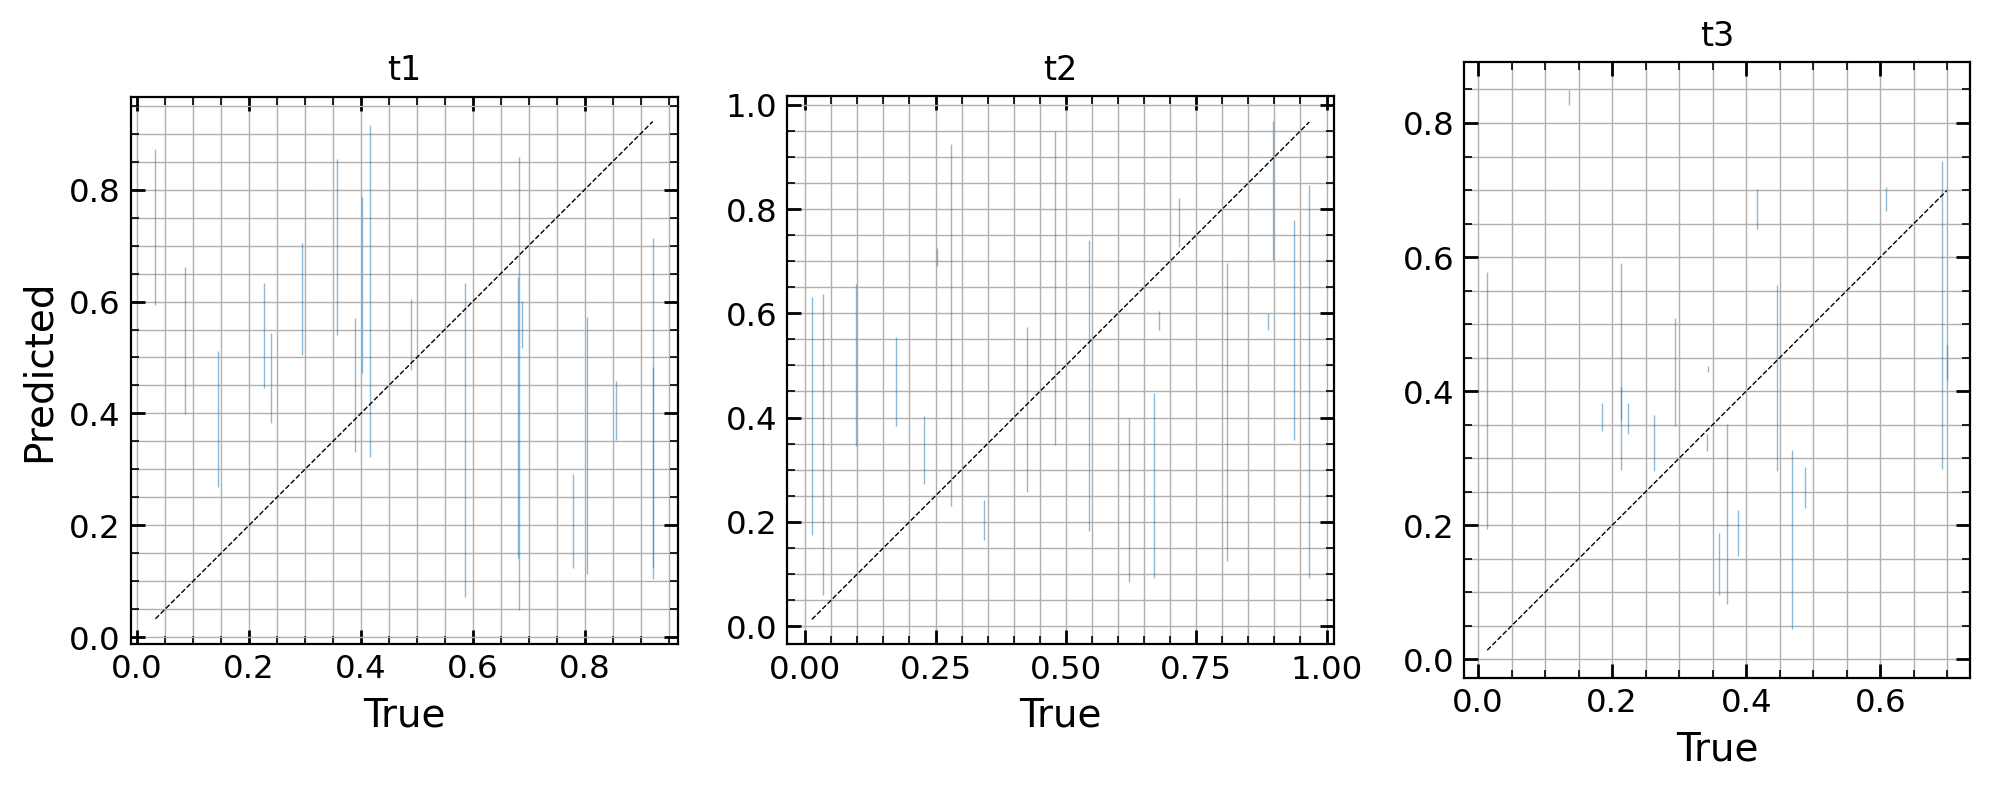

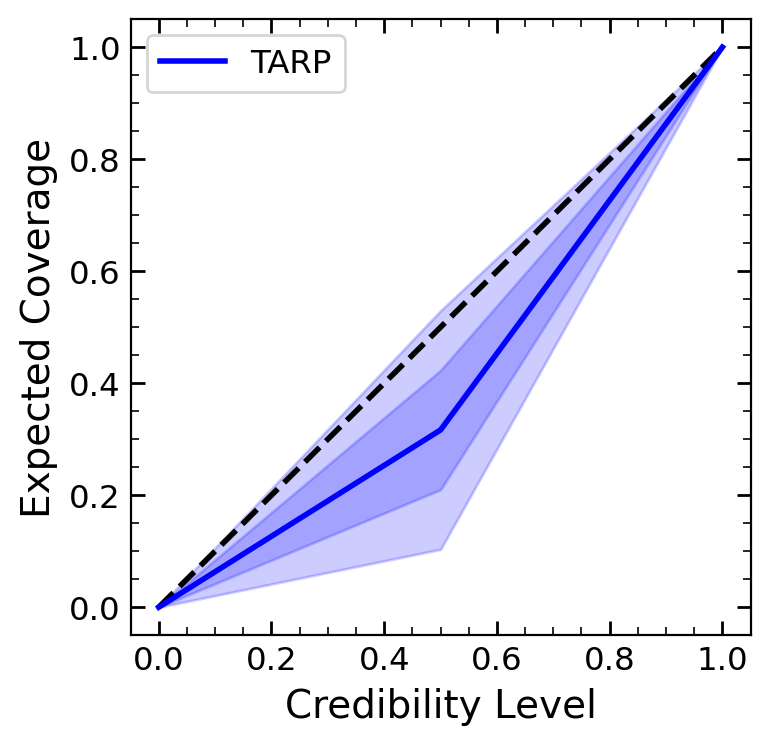

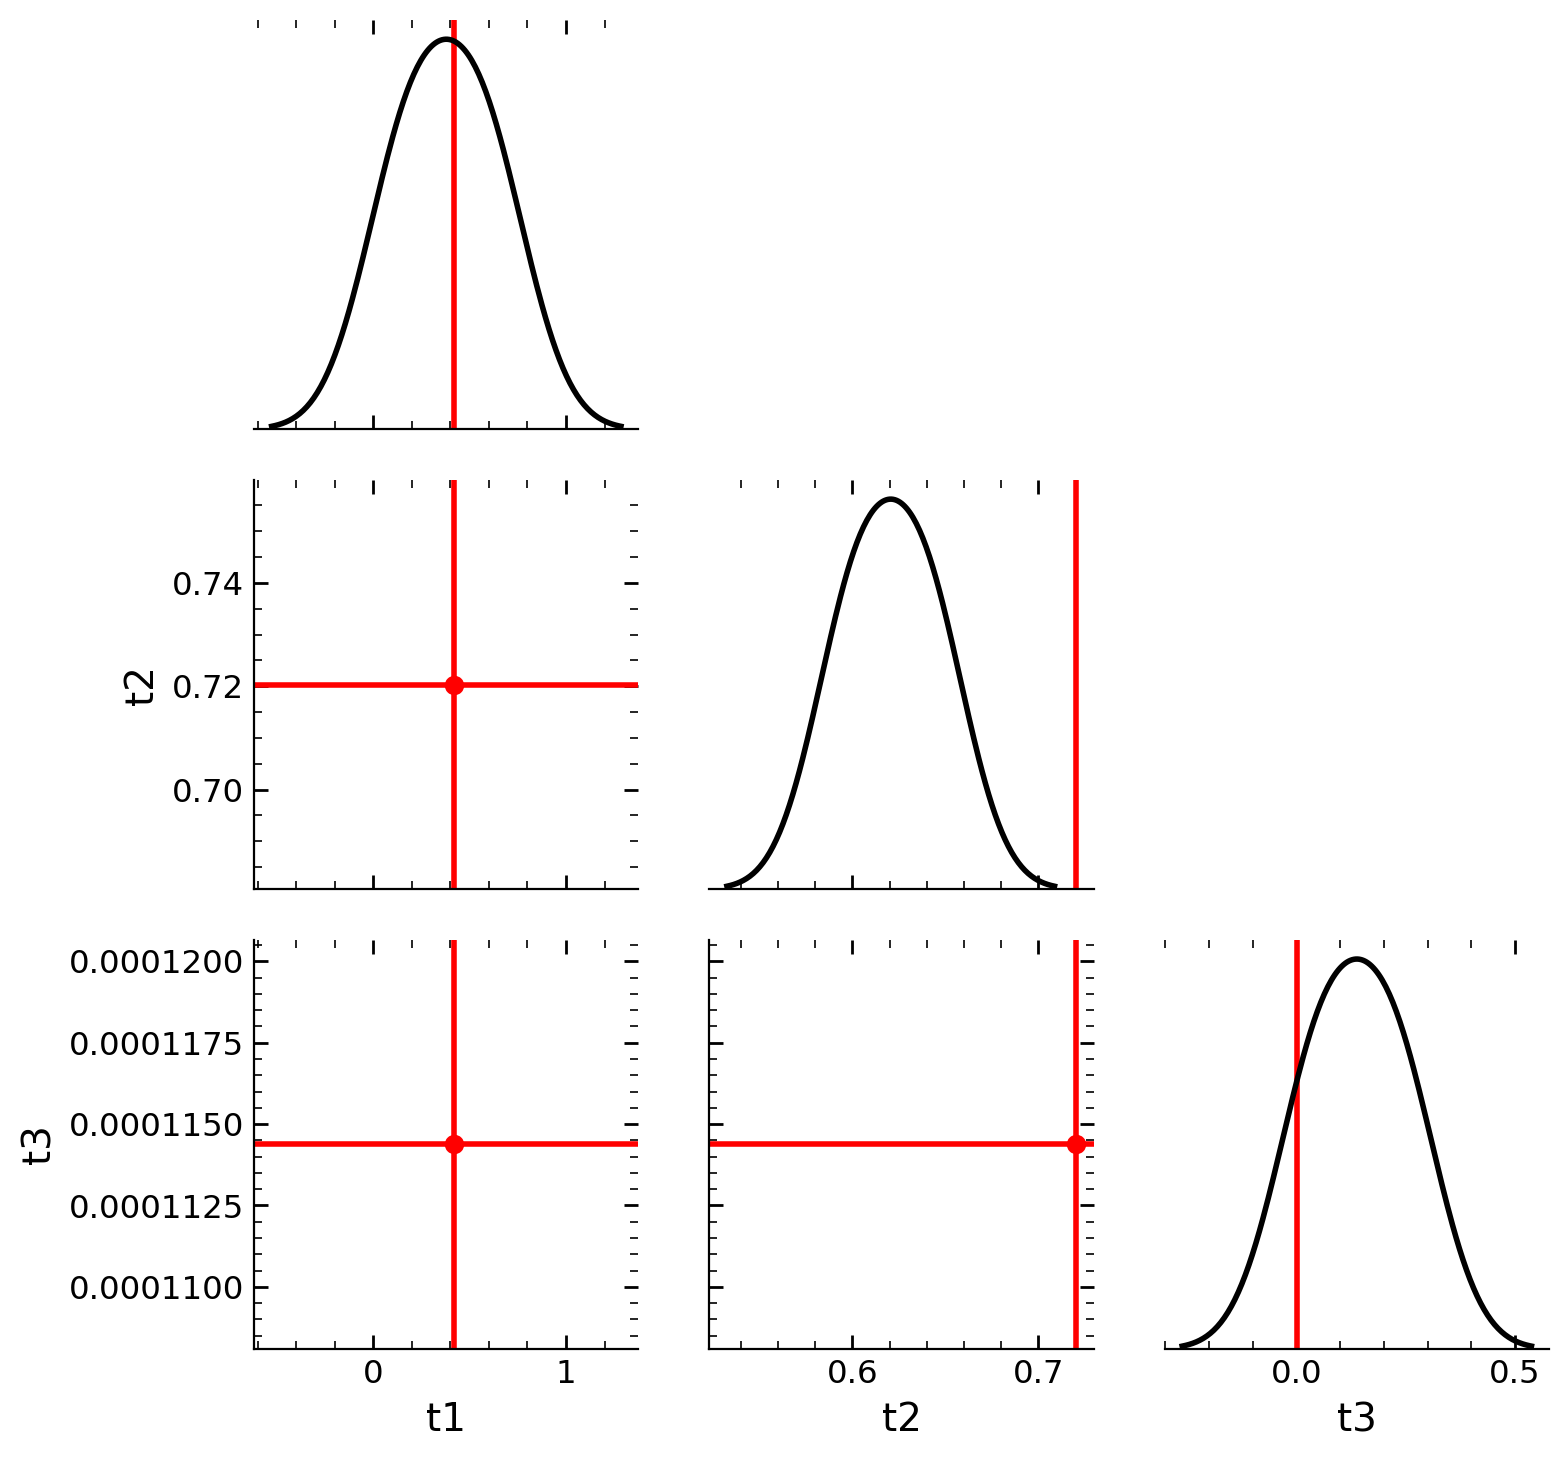

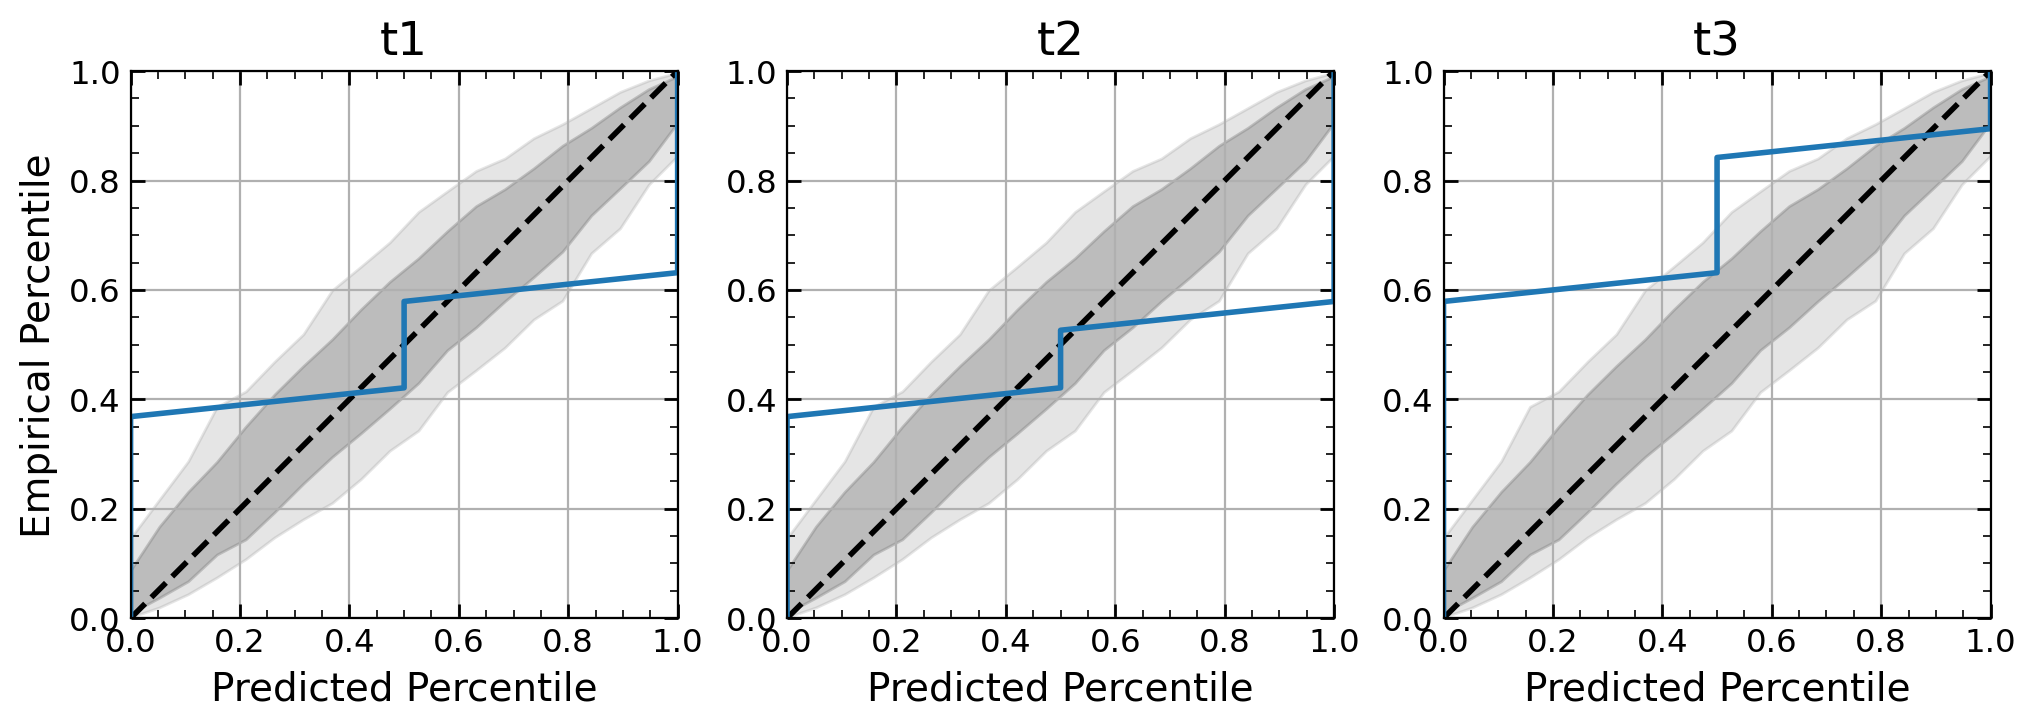

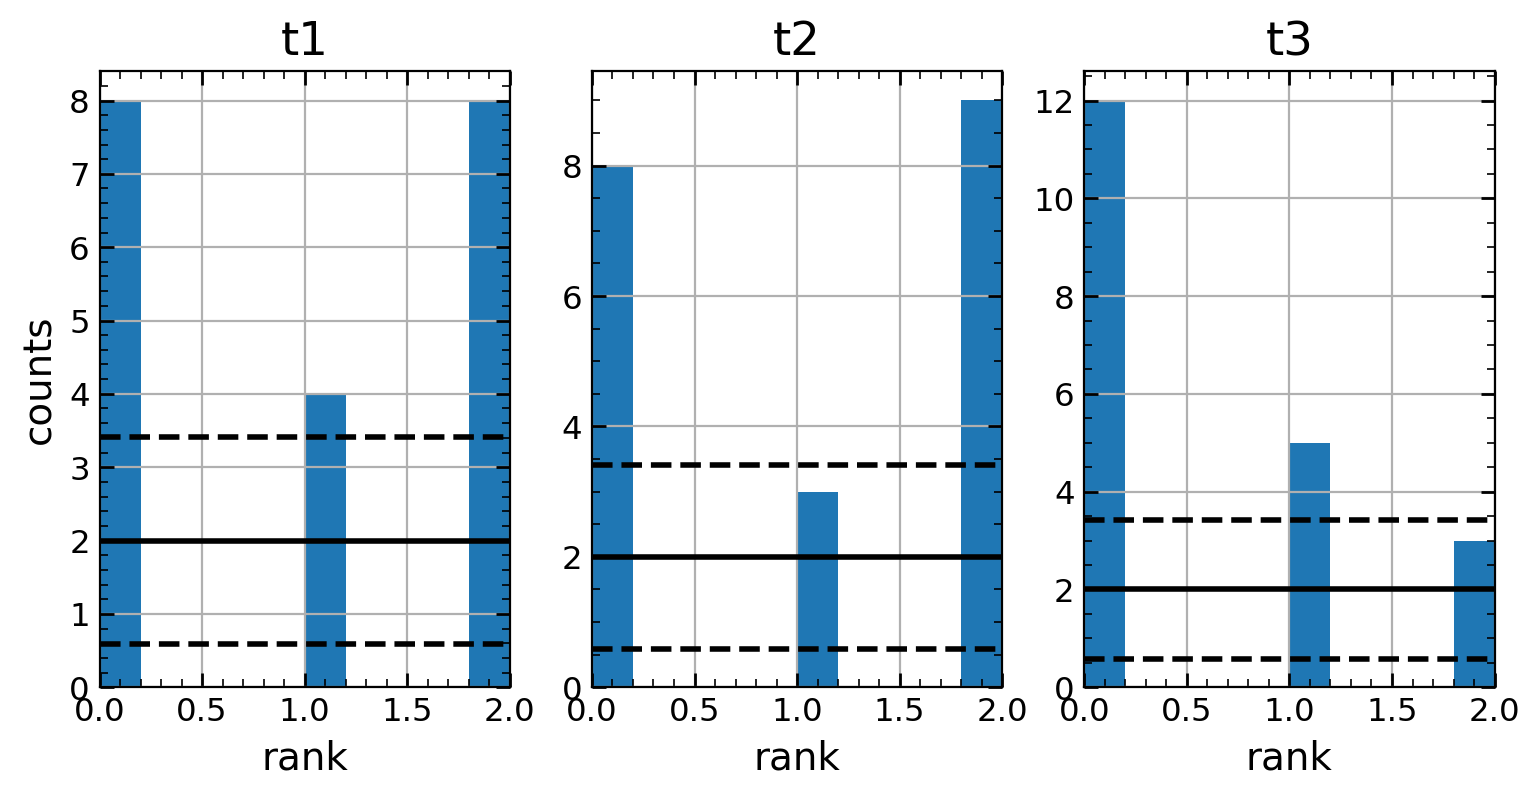

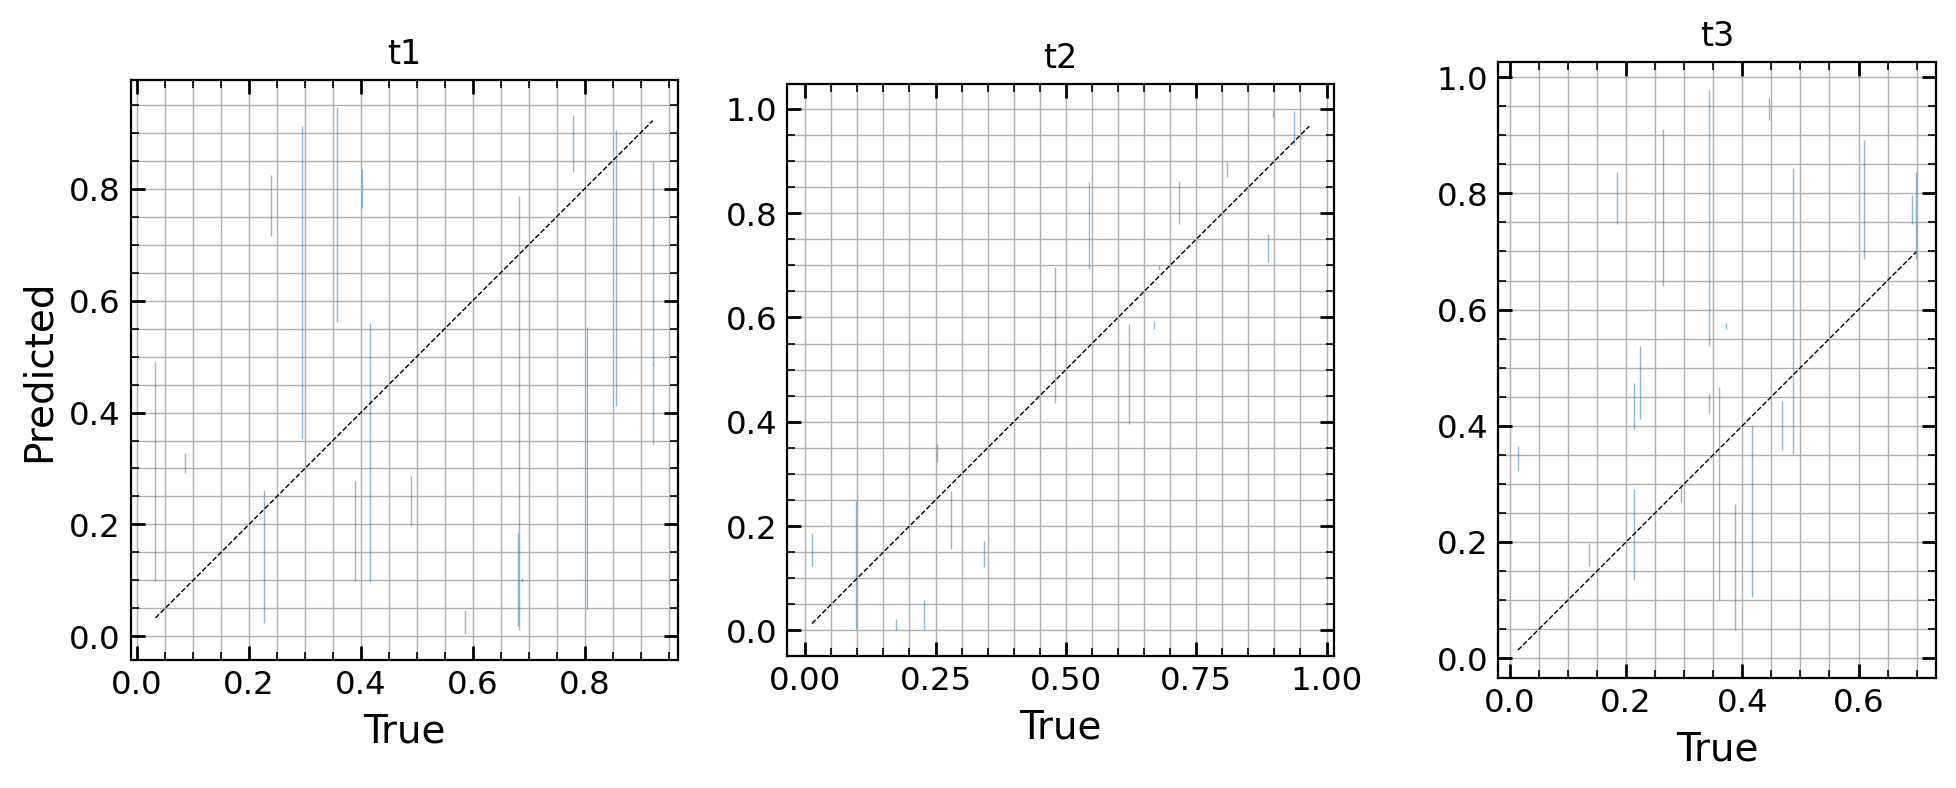

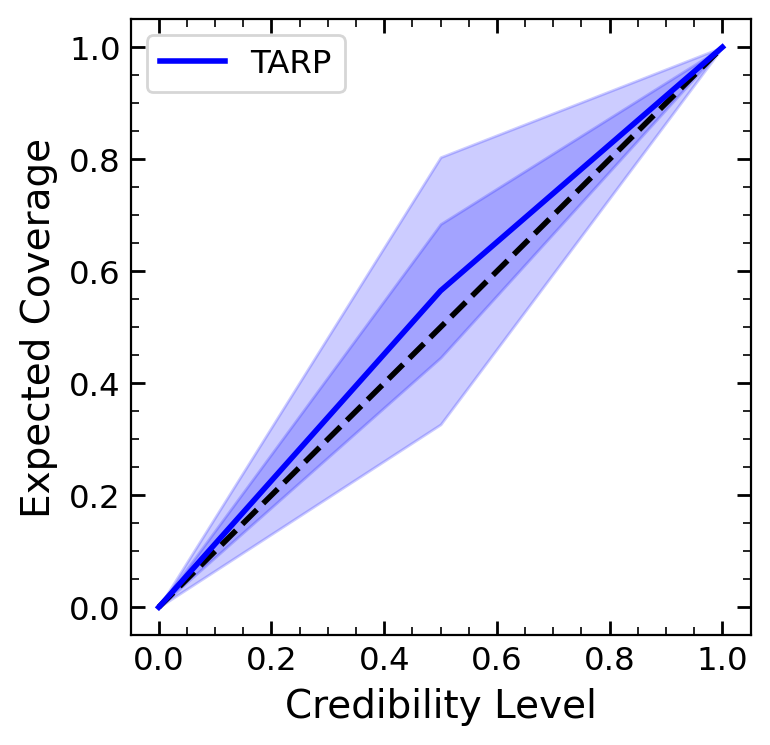

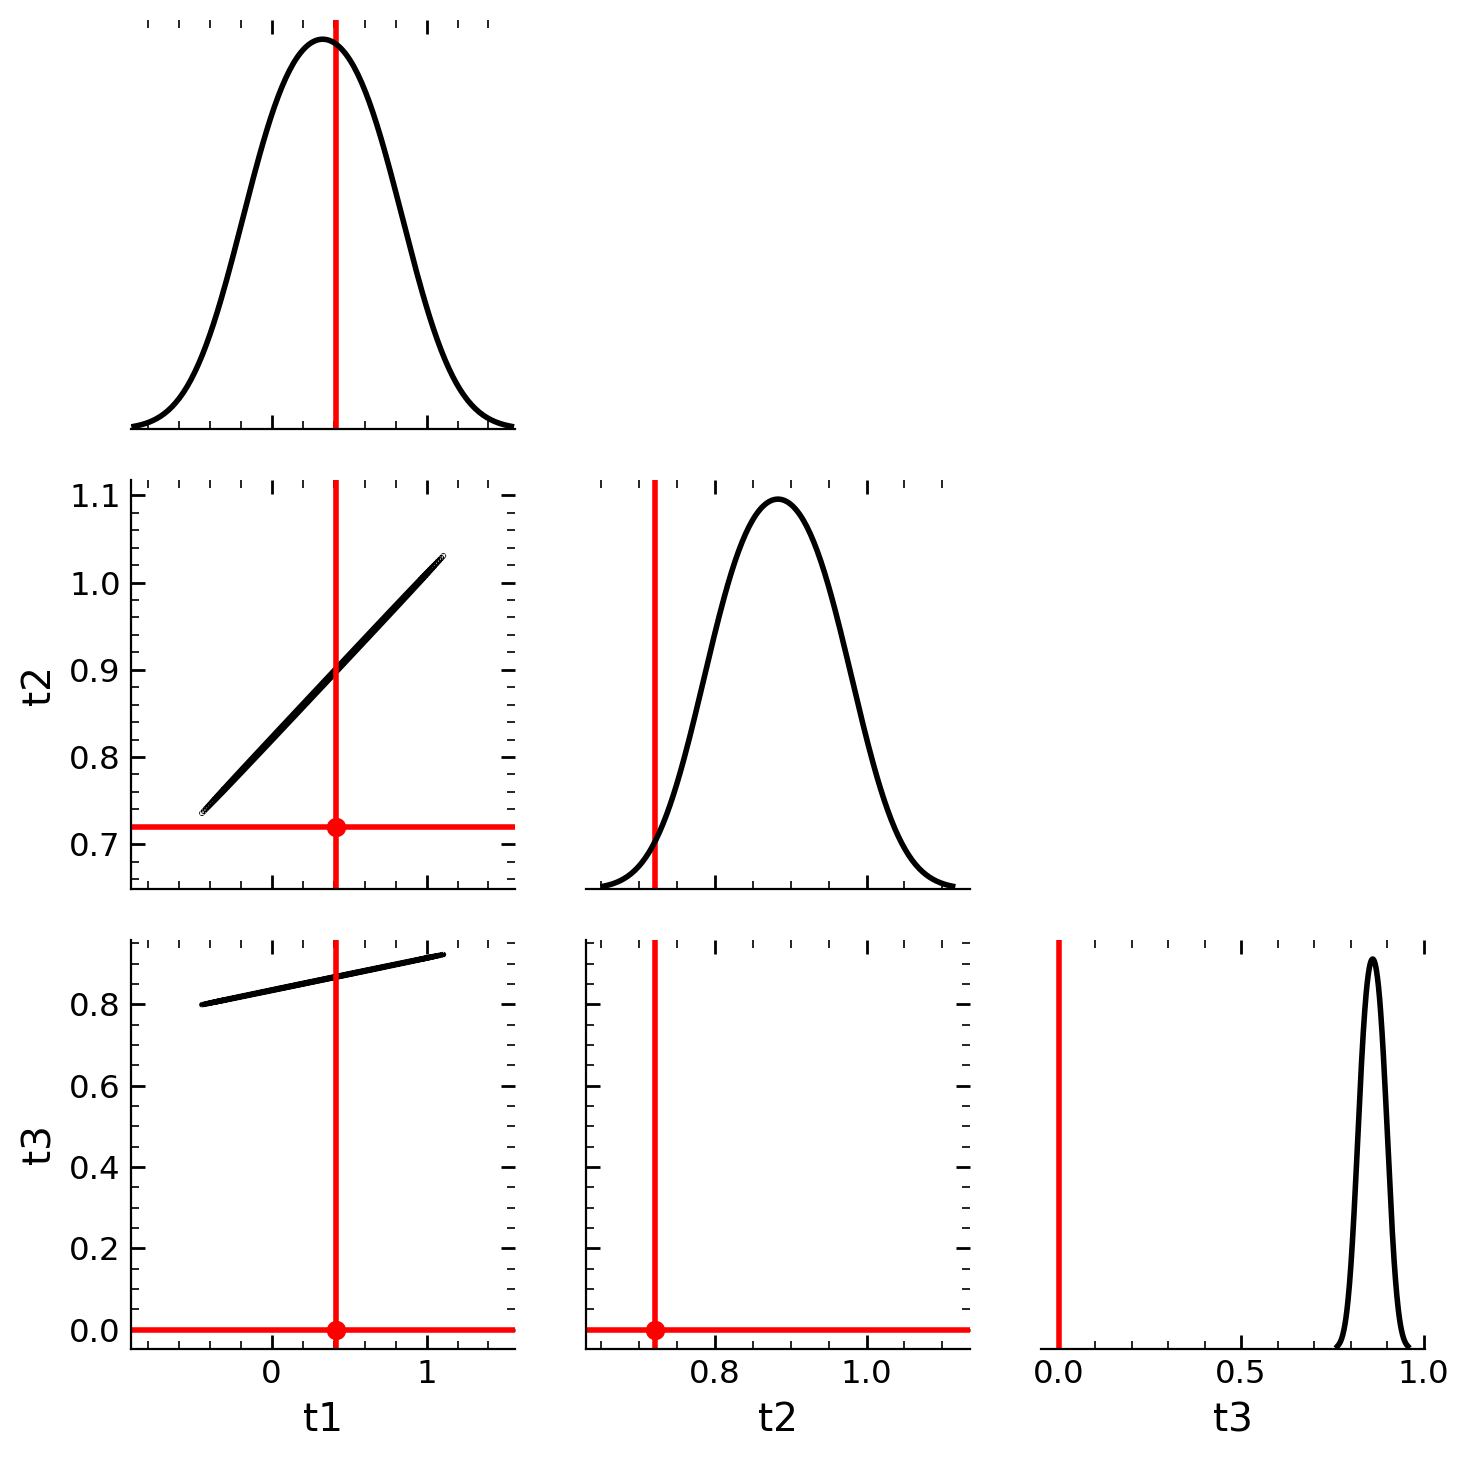

In [3]:
test_yaml()

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 2.
INFO:root:Training model 2 / 2.
INFO:root:It took 0.18719482421875 seconds to train models.


 Training neural network. Epochs trained: 6

Drawing 3 posterior samples:   0%|          | 0/3 [00:00<?, ?it/s]

Drawing 3 posterior samples:   0%|          | 0/3 [00:00<?, ?it/s]

<class 'sbi.inference.posteriors.ensemble_posterior.EnsemblePosterior'>


Drawing 6 posterior samples:   0%|          | 0/6 [00:00<?, ?it/s]

INFO:root:Saving single posterior plot to toy/plot_single_posterior.jpg...
INFO:root:Saving single posterior samples to toy/single_samples.npy...


<class 'sbi.inference.posteriors.ensemble_posterior.EnsemblePosterior'>


Drawing 4 posterior samples:   0%|          | 0/4 [00:00<?, ?it/s]

Drawing 2 posterior samples:   0%|          | 0/2 [00:00<?, ?it/s]

INFO:root:Saving single posterior plot to toy/plot_single_posterior.jpg...
INFO:root:Saving single posterior samples to toy/single_samples.npy...


<class 'sbi.inference.posteriors.ensemble_posterior.EnsemblePosterior'>



INFO:root:Mean logprob: -1.4365e+01Median logprob: -1.4051e+00

00%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2628.60it/s]

<class 'sbi.inference.posteriors.ensemble_posterior.EnsemblePosterior'>



INFO:root:Saving posterior samples to toy/posterior_samples.npy...
INFO:root:Saving coverage plot to toy/plot_coverage.jpg...
INFO:root:Saving ranks histogram to toy/ranks_histogram.jpg...
INFO:root:Mean logprob: -6.4872e+00Median logprob: -1.4517e+00
INFO:root:Saving true logprobs to toy/true_logprobs.npy...
INFO:root:Saving true logprobs plot to toy/plot_true_logprobs.jpg...

00%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.33s/it]

<class 'sbi.inference.posteriors.ensemble_posterior.EnsemblePosterior'>



00%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.41it/s]

<class 'sbi.inference.posteriors.ensemble_posterior.EnsemblePosterior'>



00%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:09<00:00,  9.26s/it]

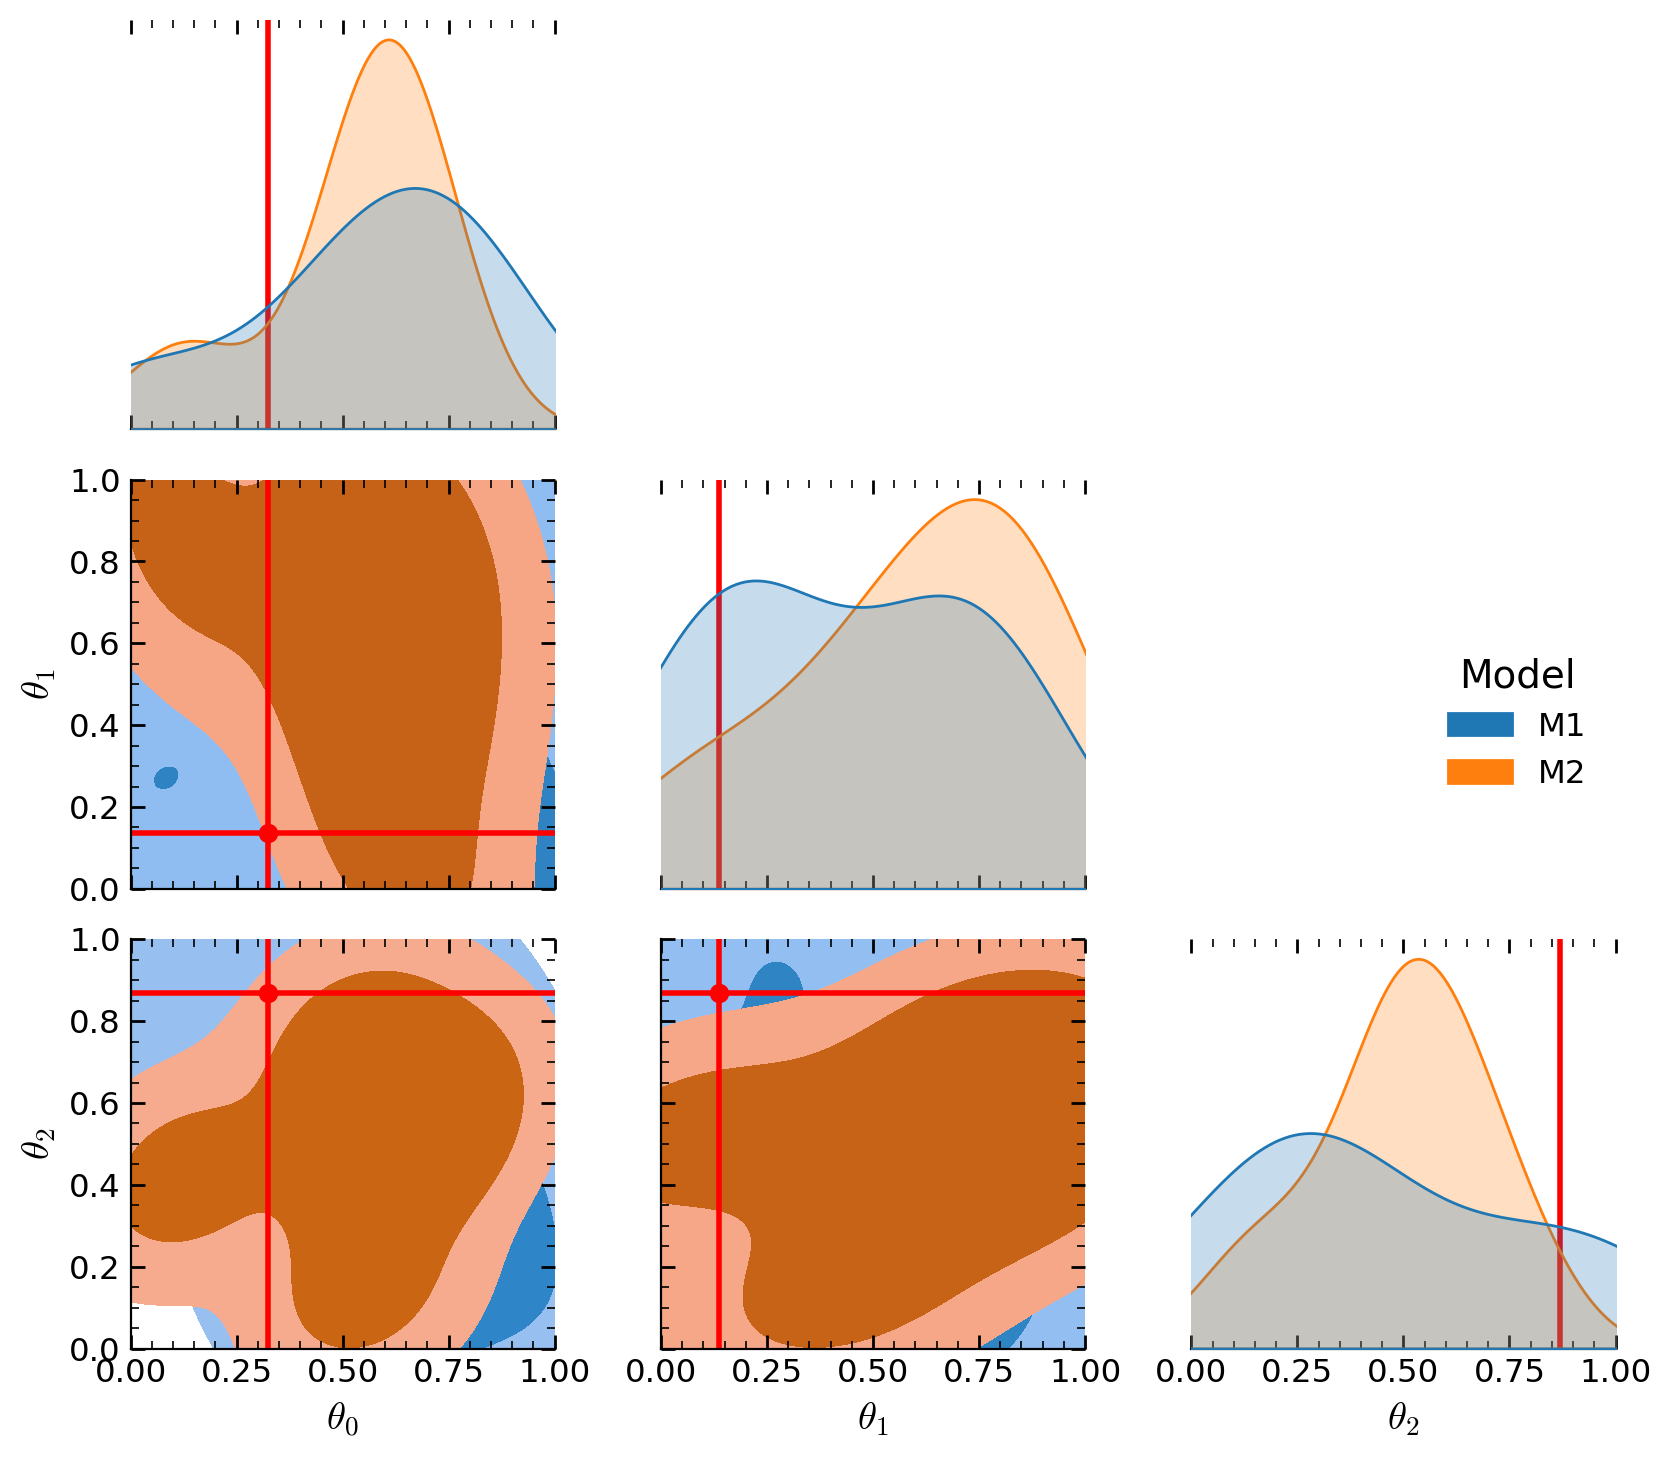

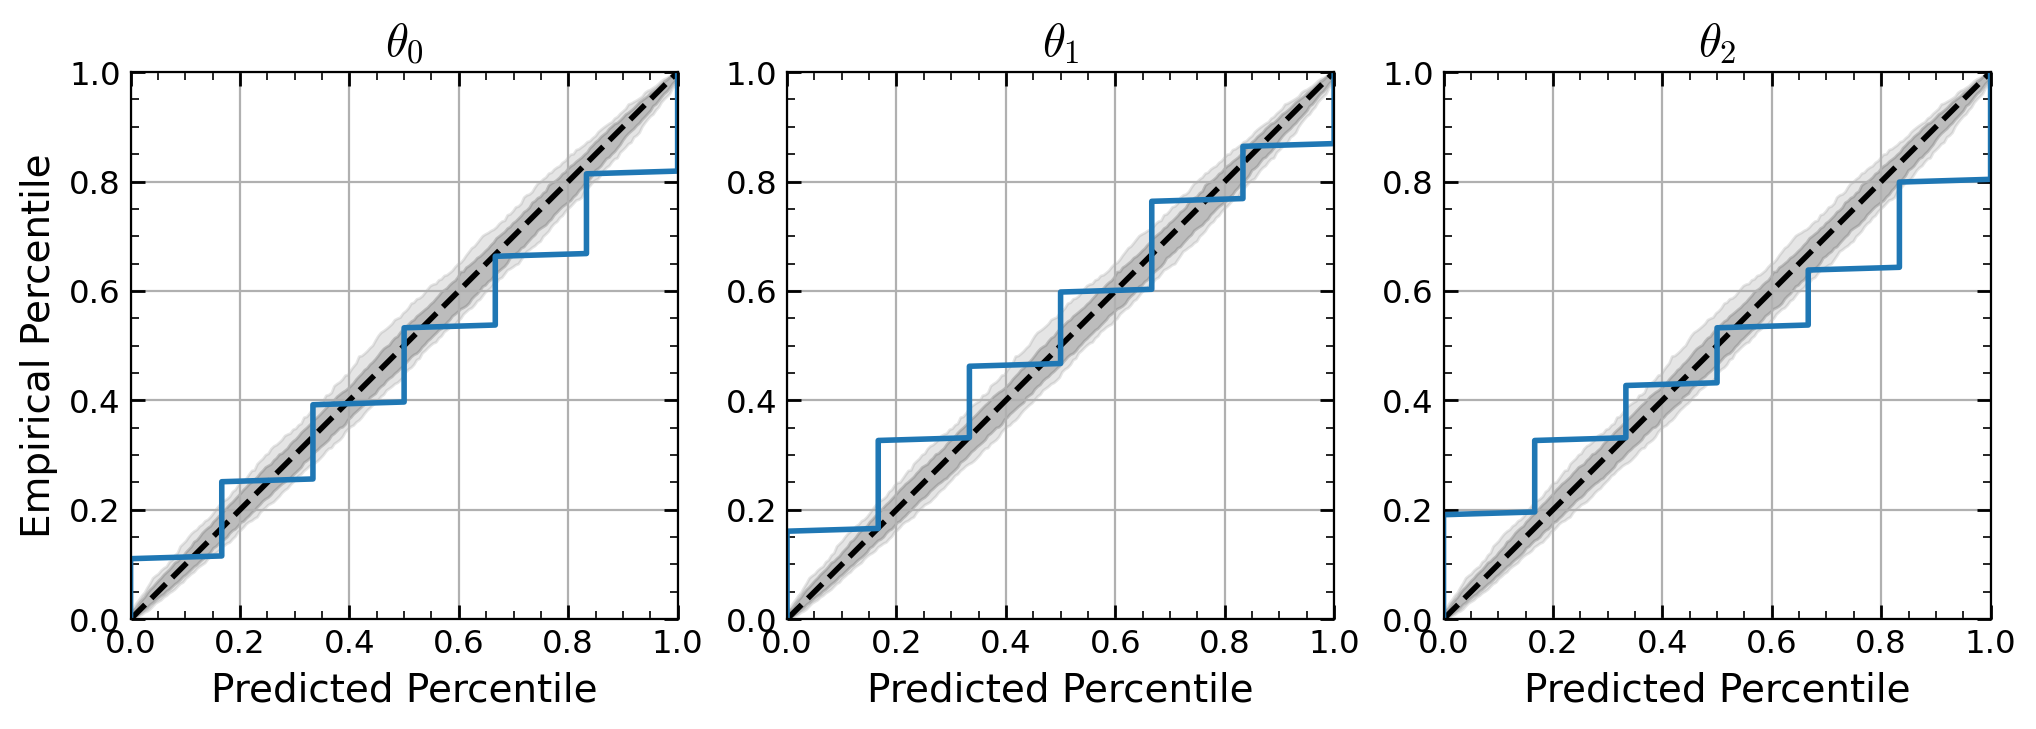

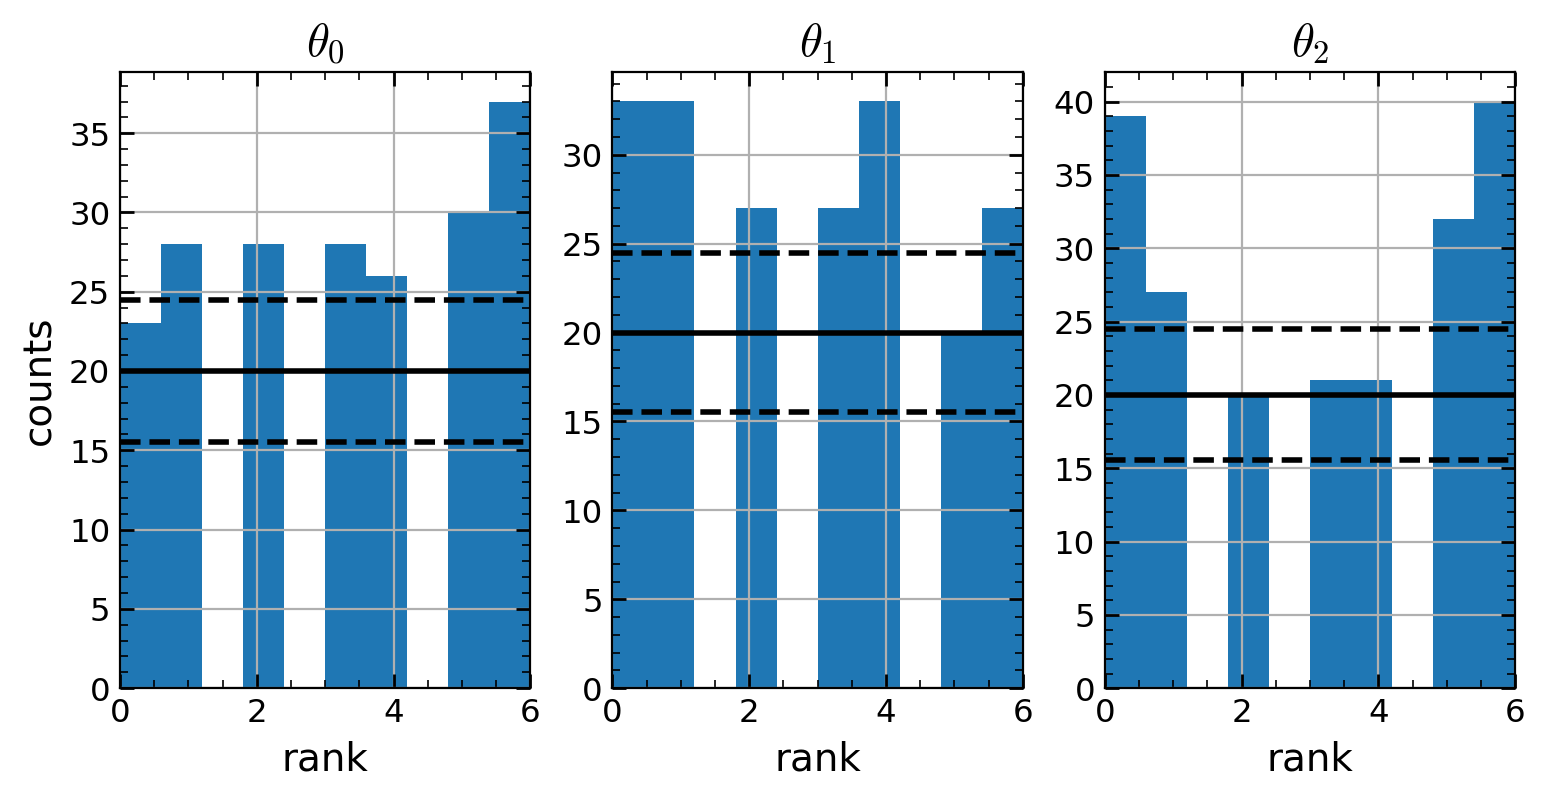

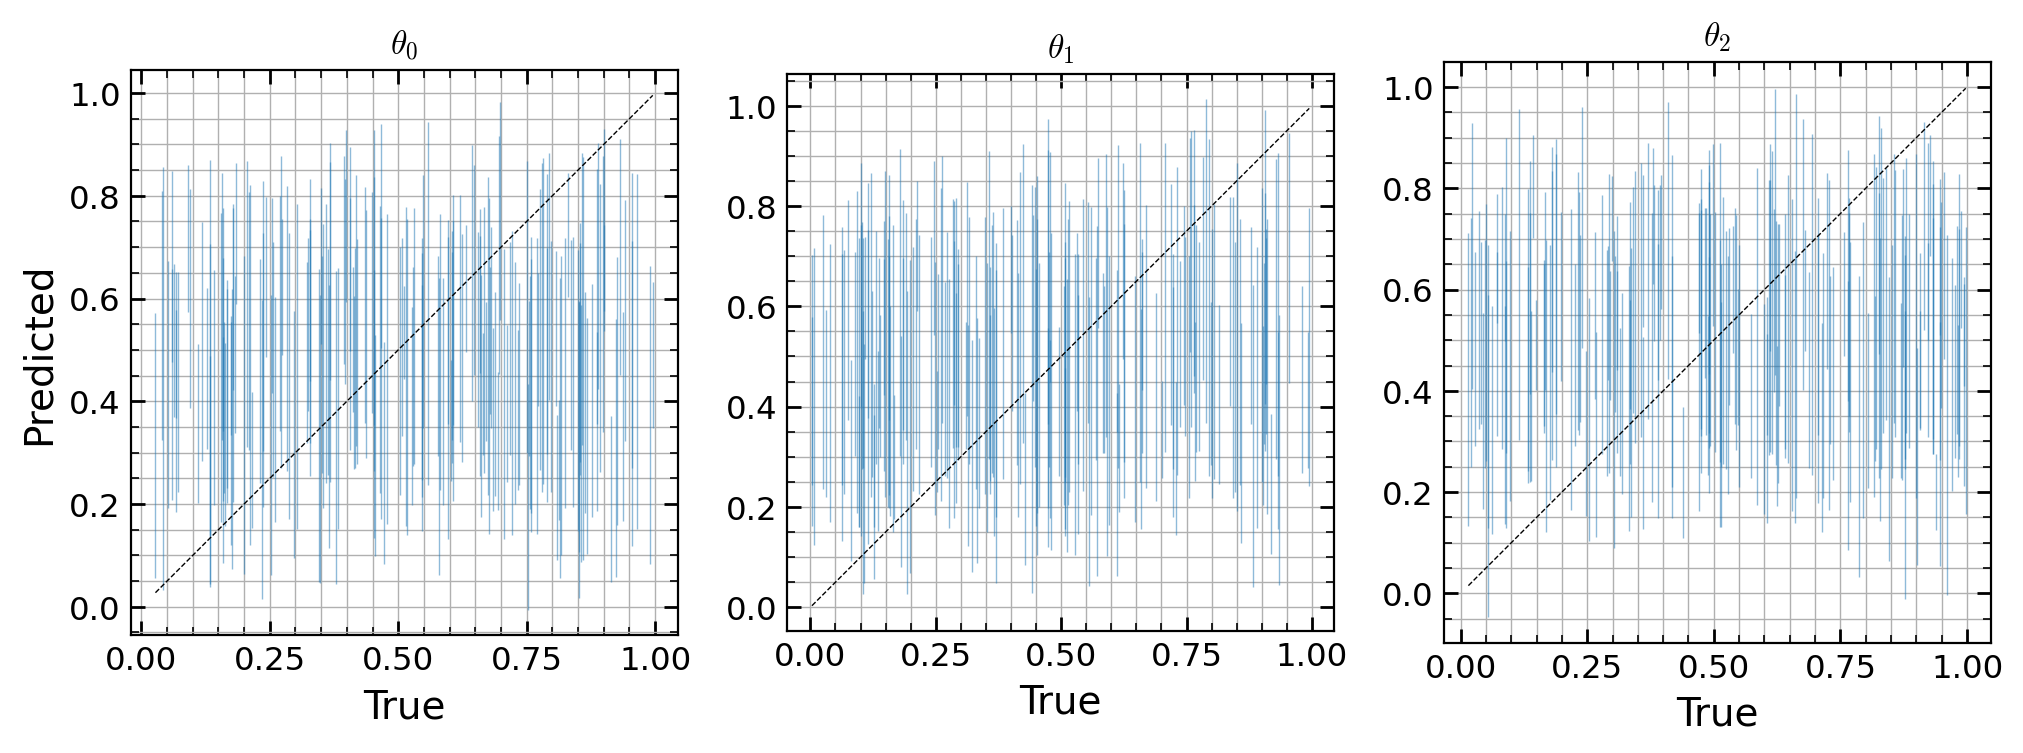

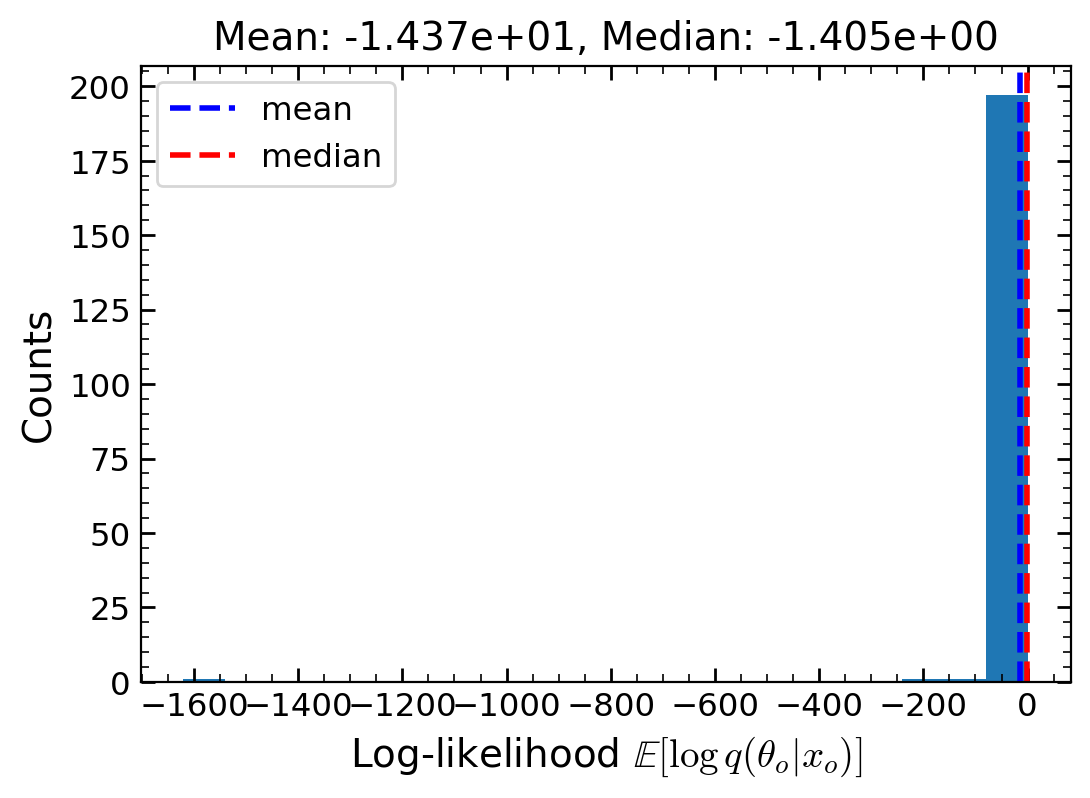

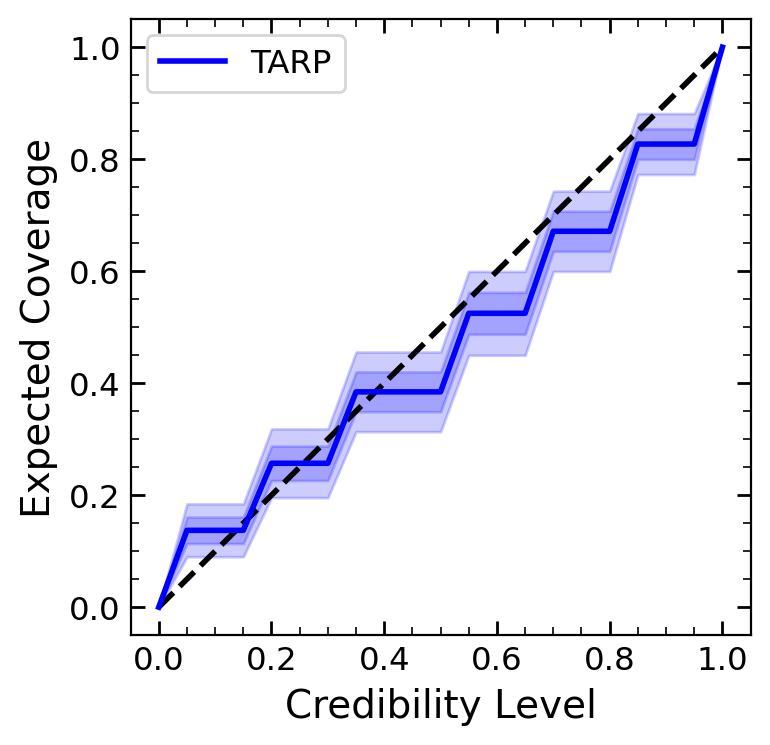

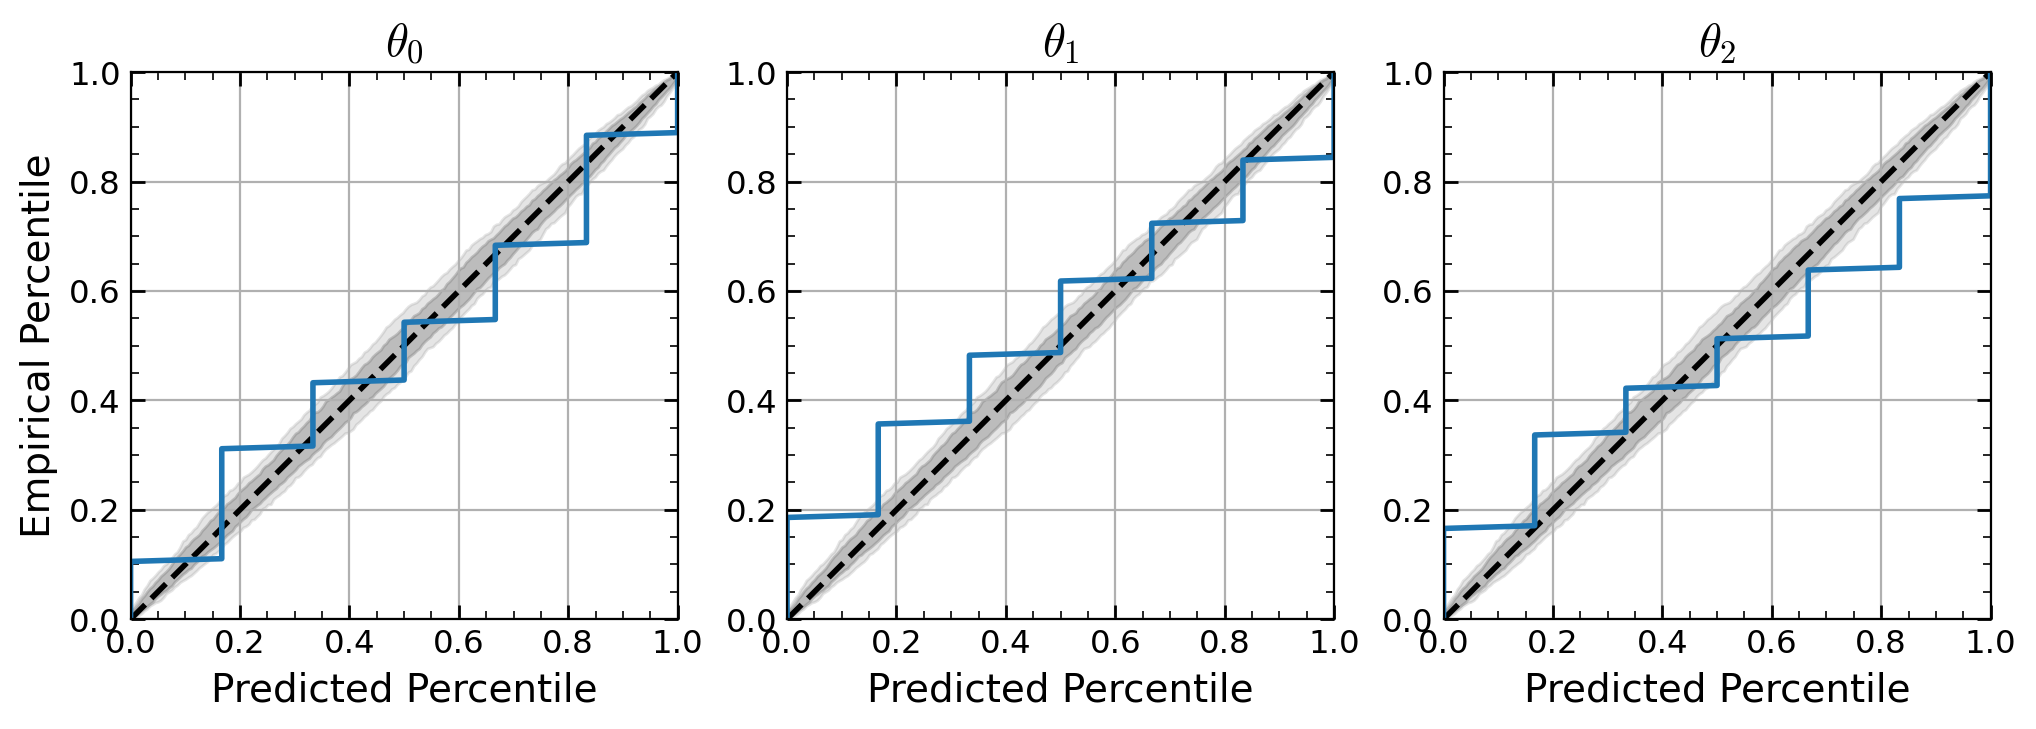

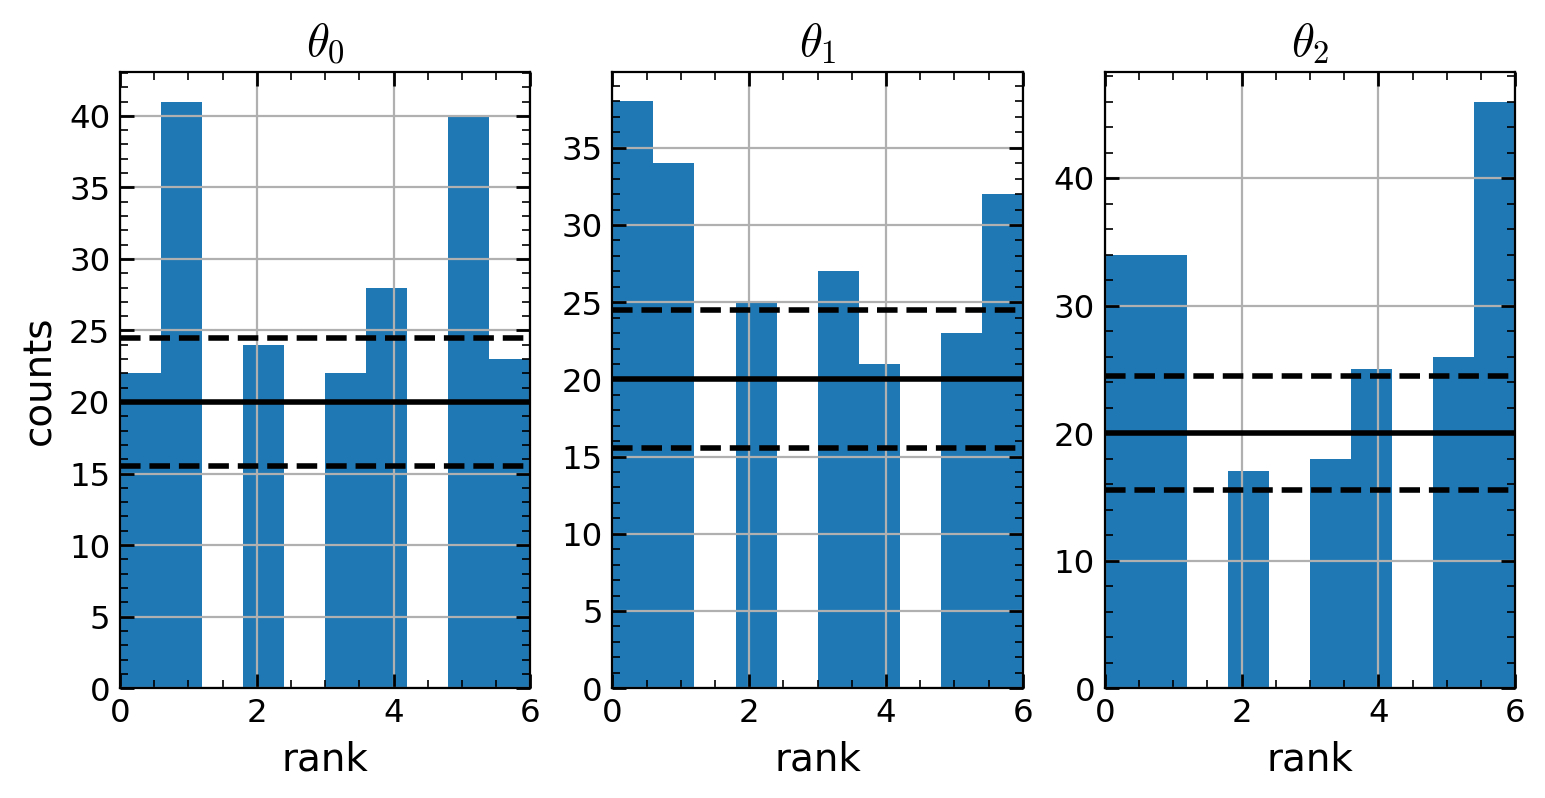

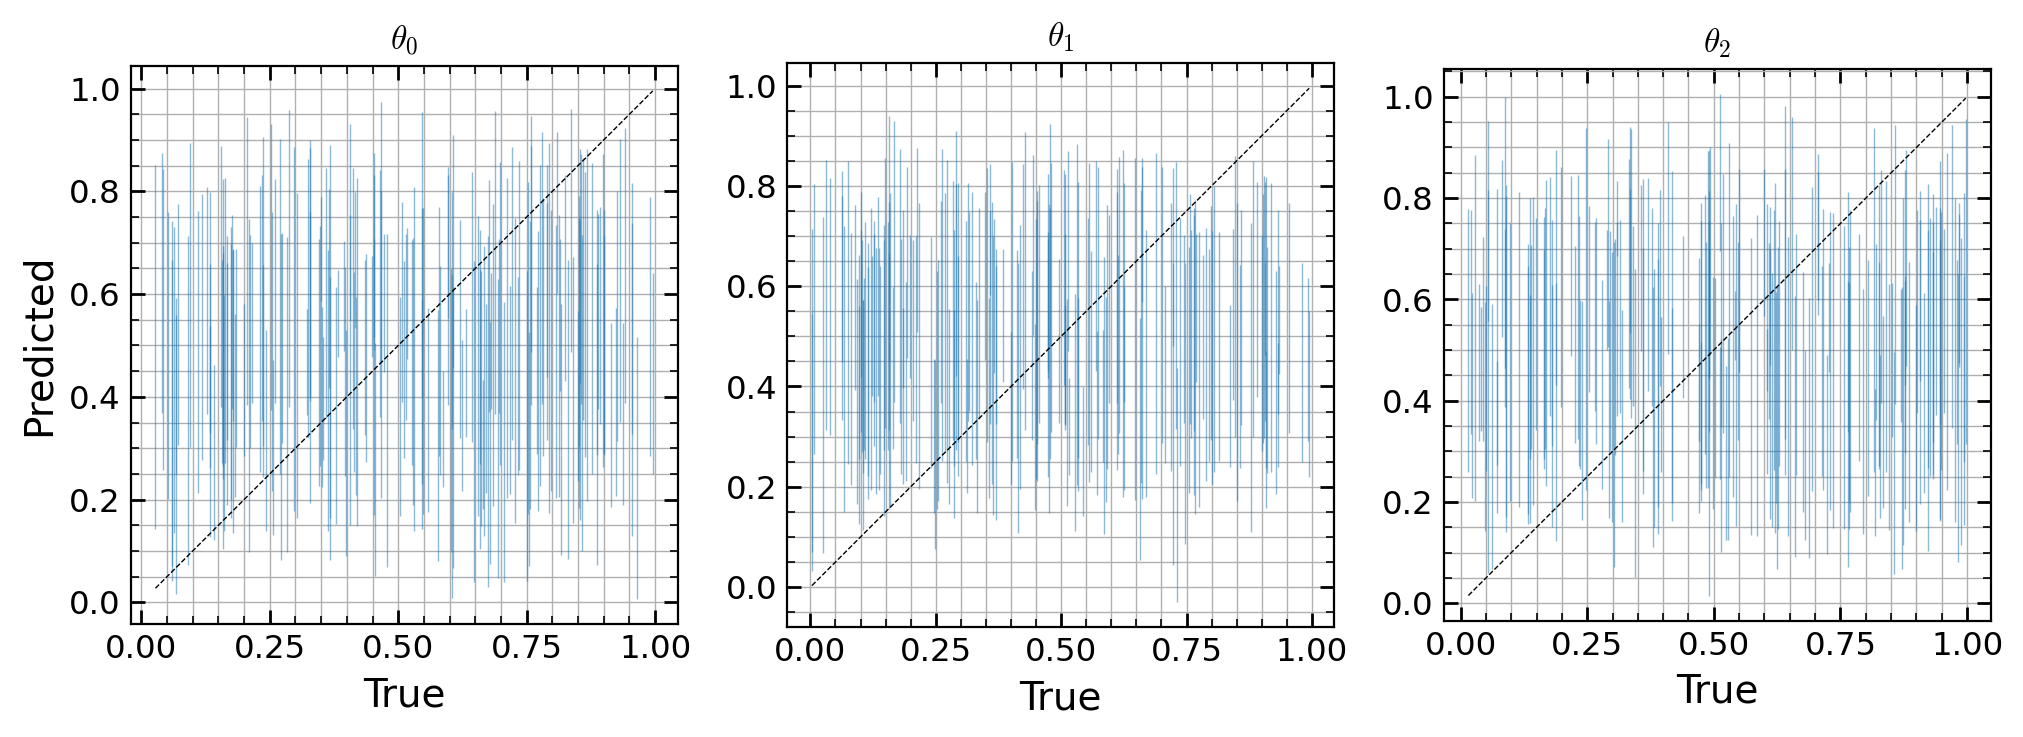

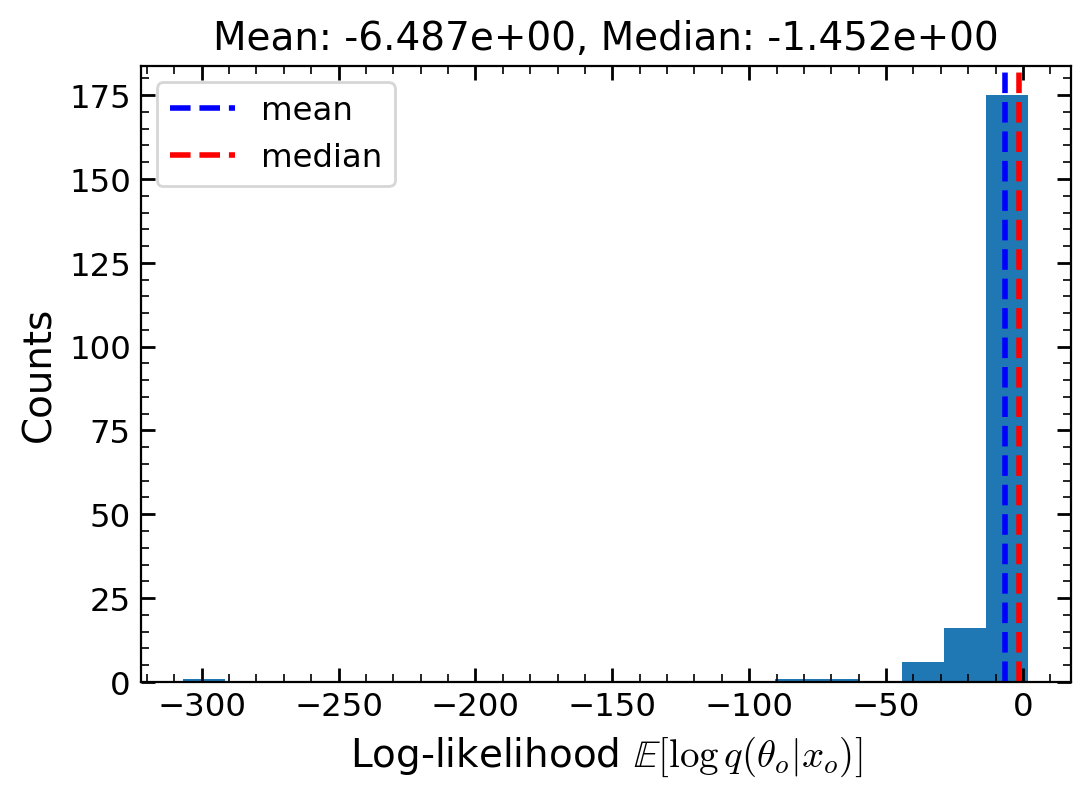

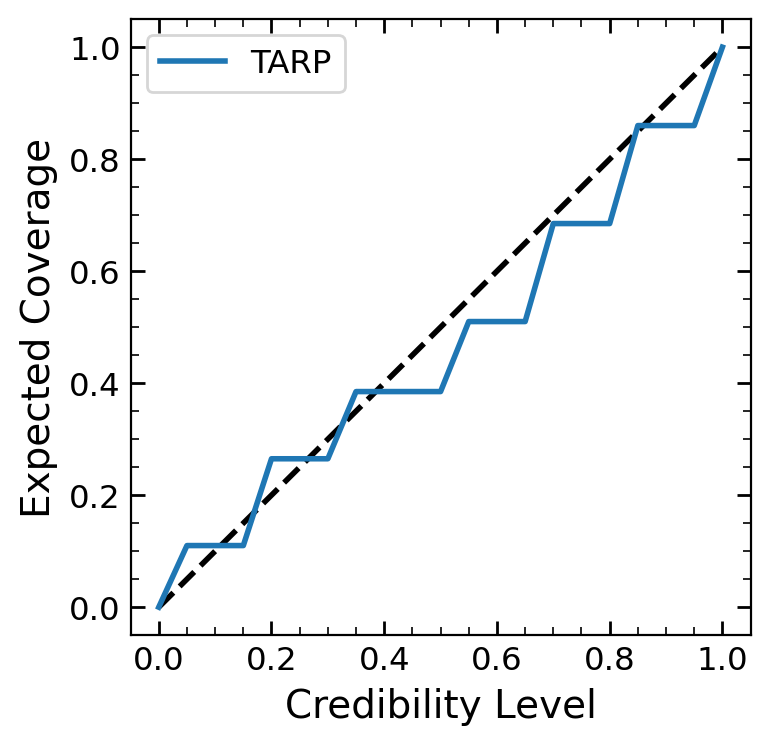

In [4]:
test_snpe()

INFO:root:MODEL INFERENCE CLASS: NLE
INFO:root:Training model 1 / 2.
INFO:root:Training model 2 / 2.


SIMULATOR 3
 Training neural network. Epochs trained: 5

INFO:root:It took 0.4569716453552246 seconds to train models.


 Training neural network. Epochs trained: 6

Running vectorized MCMC with 2 chains:   0%|          | 0/520 [00:00<?, ?it/s]

<class 'sbi.inference.posteriors.ensemble_posterior.EnsemblePosterior'>


Running vectorized MCMC with 2 chains:   0%|          | 0/122 [00:00<?, ?it/s]

<class 'sbi.inference.posteriors.ensemble_posterior.EnsemblePosterior'>


  0%|          | 0/2000 [00:00<?, ?it/s]


Converged with loss: 66.45


INFO:root:MODEL INFERENCE CLASS: NLE
INFO:root:Training model 1 / 2.
INFO:root:Training model 2 / 2.


SIMULATOR 1
 Training neural network. Epochs trained: 5

INFO:root:It took 0.47526049613952637 seconds to train models.


 Training neural network. Epochs trained: 6

Running vectorized MCMC with 2 chains:   0%|          | 0/520 [00:00<?, ?it/s]

<class 'sbi.inference.posteriors.ensemble_posterior.EnsemblePosterior'>


Running vectorized MCMC with 2 chains:   0%|          | 0/122 [00:00<?, ?it/s]

<class 'sbi.inference.posteriors.ensemble_posterior.EnsemblePosterior'>


  0%|          | 0/2000 [00:00<?, ?it/s]


Converged with loss: 35.43
<class 'sbi.inference.posteriors.ensemble_posterior.EnsemblePosterior'>
<class 'sbi.inference.posteriors.ensemble_posterior.EnsemblePosterior'>



00%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.65s/it]

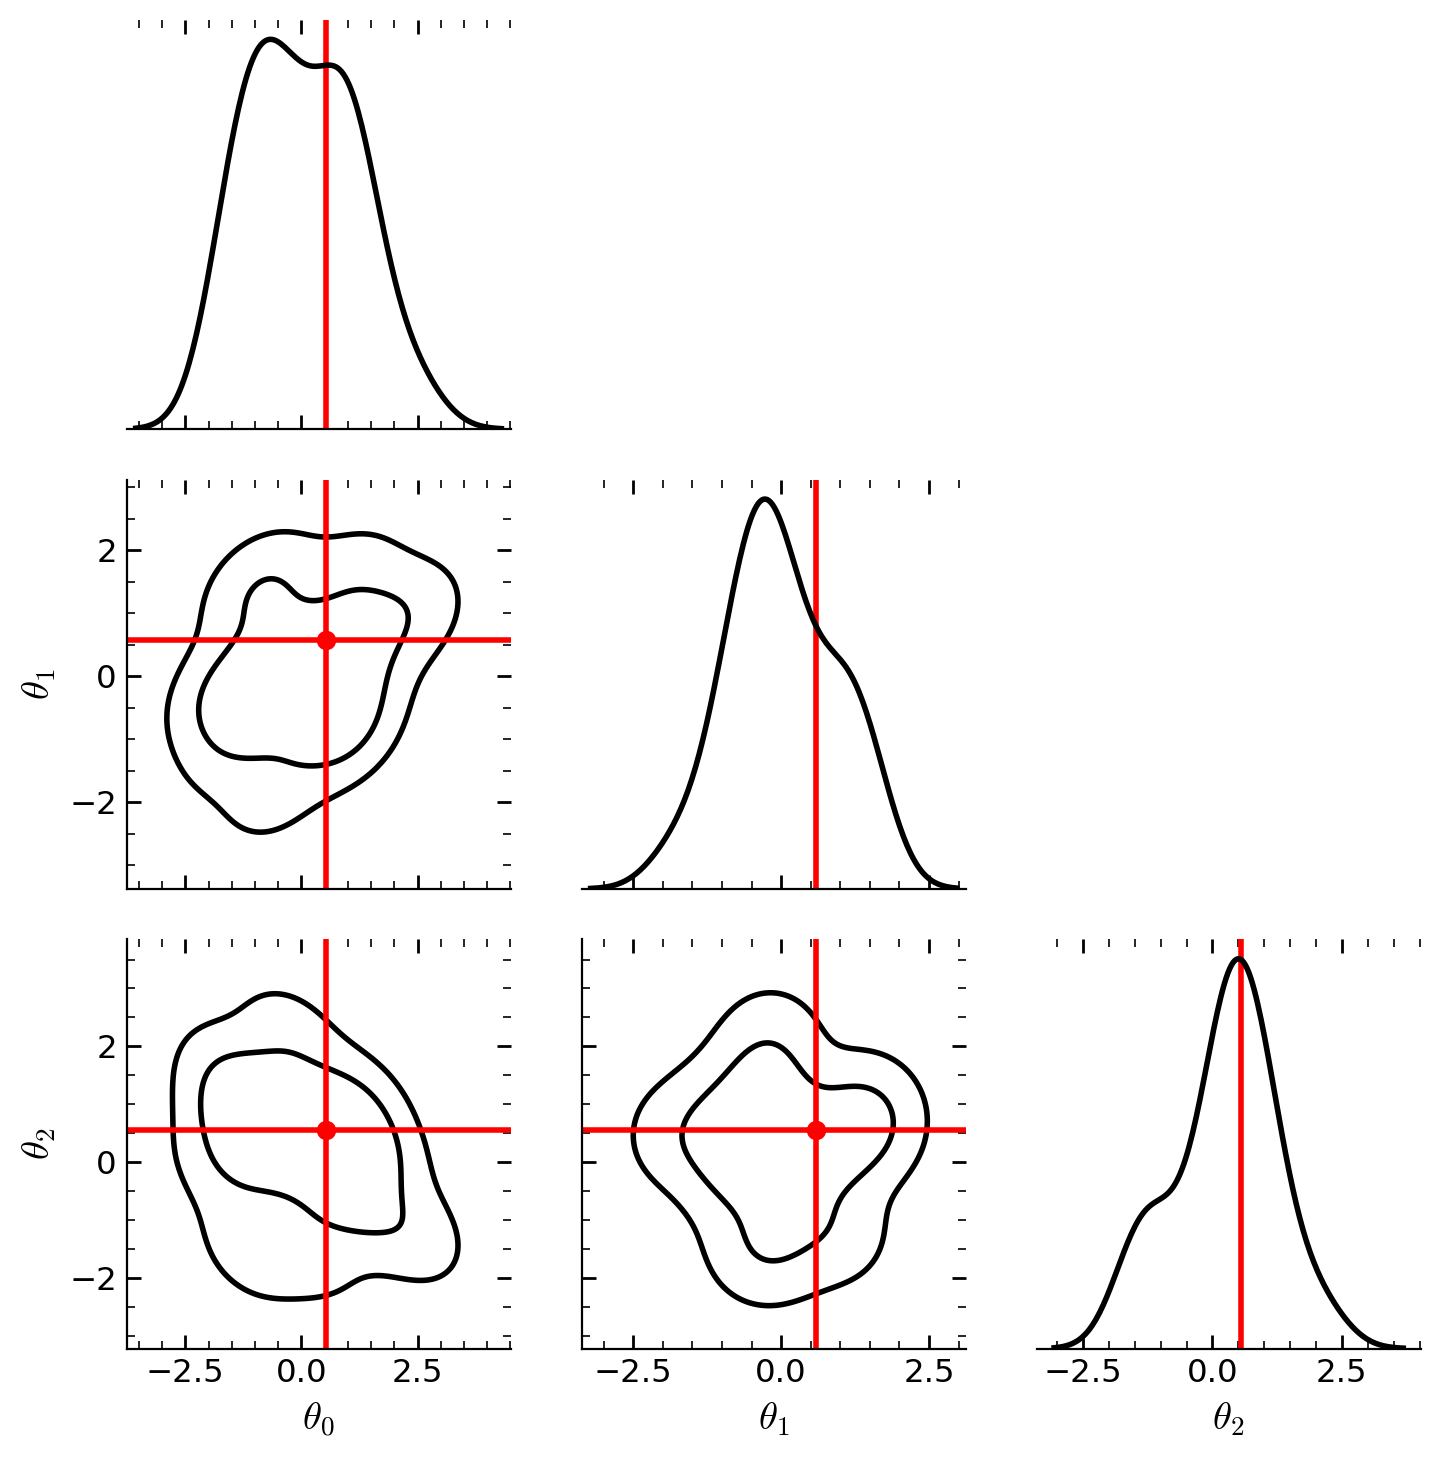

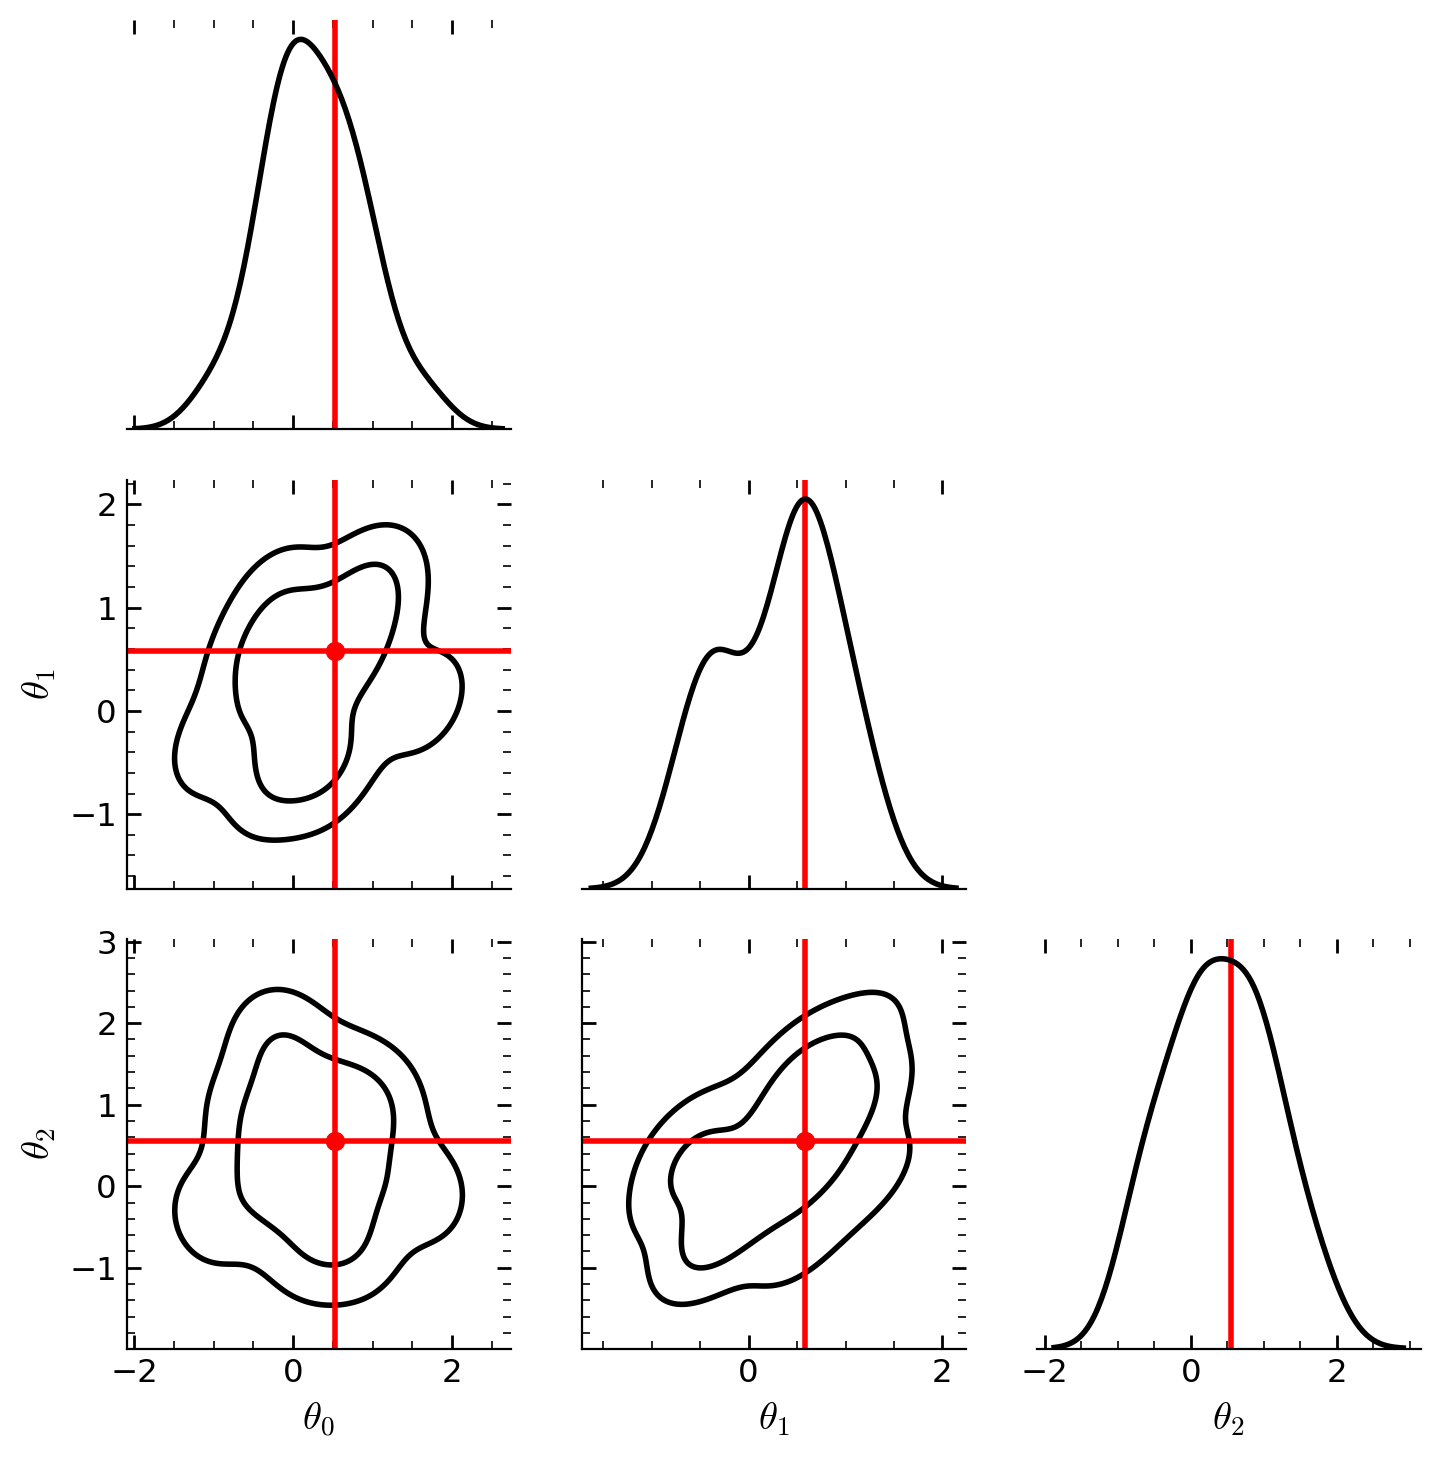

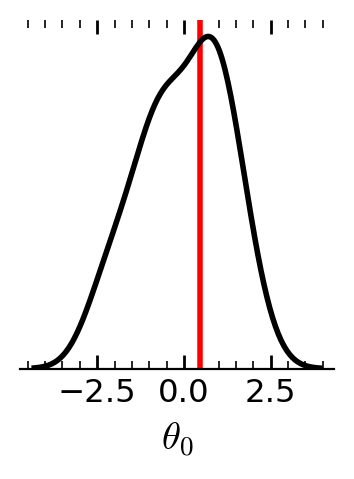

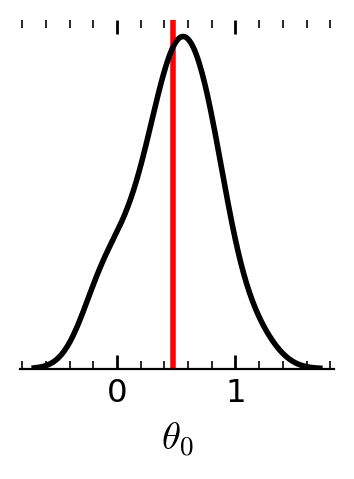

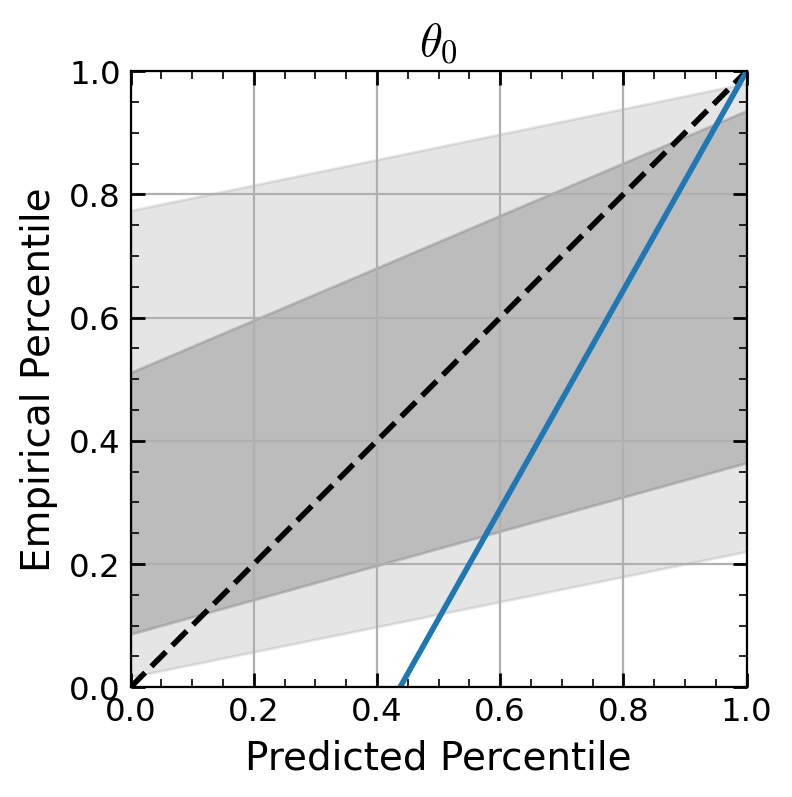

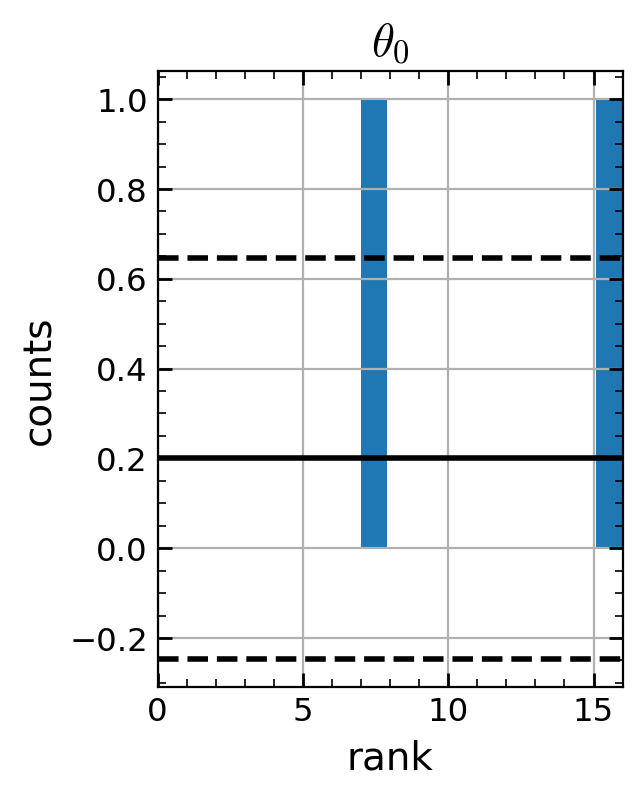

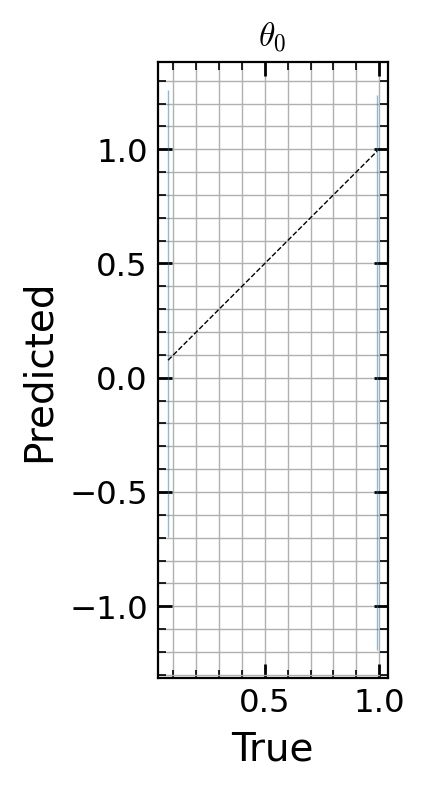

In [5]:
test_snle()

In [6]:
test_snre()

INFO:root:MODEL INFERENCE CLASS: NRE
INFO:root:Training model 1 / 2.
INFO:root:Training model 2 / 2.


 Training neural network. Epochs trained: 3

INFO:root:It took 0.2812783718109131 seconds to train models.
INFO:root:Saving model to toy


 Training neural network. Epochs trained: 6

In [3]:
test_multiround()

Running 400 simulations.:   0%|          | 0/400 [00:00<?, ?it/s]

INFO:root:MODEL INFERENCE CLASS: SNPE
INFO:root:The first round of inference will use existing sims from the loader. Make sure that the simulations were run from the given proposal distribution for consistency.
INFO:root:Running round 1 / 2
INFO:root:Training model 1 / 2.
INFO:root:Training model 2 / 2.


 Training neural network. Epochs trained: 6

Drawing 221 posterior samples:   0%|          | 0/221 [00:00<?, ?it/s]

Drawing 179 posterior samples:   0%|          | 0/179 [00:00<?, ?it/s]

Running 400 simulations.:   0%|          | 0/400 [00:00<?, ?it/s]

INFO:root:Running round 2 / 2
INFO:root:Training model 1 / 2.


Using SNPE-C with atomic loss
 Training neural network. Epochs trained: 5

INFO:root:Training model 2 / 2.


 Training neural network. Epochs trained: 6Using SNPE-C with atomic loss
 Training neural network. Epochs trained: 5

INFO:root:It took 3.0462214946746826 seconds to train models.
INFO:root:Saving model to toy
INFO:root:MODEL INFERENCE CLASS: SNPE
INFO:root:The first round of inference will simulate from the given proposal or prior.


 Training neural network. Epochs trained: 6

Running 400 simulations.:   0%|          | 0/400 [00:00<?, ?it/s]

INFO:root:Running round 1 / 1
INFO:root:Training model 1 / 2.
INFO:root:Training model 2 / 2.


 Training neural network. Epochs trained: 4

INFO:root:It took 0.28392815589904785 seconds to train models.
INFO:root:Saving model to toy
INFO:root:MODEL INFERENCE CLASS: MCABC


 Training neural network. Epochs trained: 6

Running 1000 simulations.:   0%|          | 0/1000 [00:00<?, ?it/s]

INFO:root:It took 0.05262112617492676 seconds to run the model.


In [8]:
test_prior()

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 1.
INFO:root:It took 0.08608269691467285 seconds to train models.
INFO:root:Saving model to toy


 Training neural network. Epochs trained: 6

Drawing 20 posterior samples:   0%|          | 0/20 [00:00<?, ?it/s]

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 1.


 Training neural network. Epochs trained: 4

INFO:root:It took 0.11228728294372559 seconds to train models.
INFO:root:Saving model to toy


 Training neural network. Epochs trained: 6

Drawing 20 posterior samples:   0%|          | 0/20 [00:00<?, ?it/s]

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 1.
INFO:root:It took 0.0821981430053711 seconds to train models.
INFO:root:Saving model to toy


 Training neural network. Epochs trained: 6

Drawing 20 posterior samples:   0%|          | 0/20 [00:00<?, ?it/s]

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 1.


 Training neural network. Epochs trained: 1

INFO:root:It took 0.08274626731872559 seconds to train models.
INFO:root:Saving model to toy


 Training neural network. Epochs trained: 6

Drawing 20 posterior samples:   0%|          | 0/20 [00:00<?, ?it/s]

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 1.
INFO:root:It took 0.07825326919555664 seconds to train models.
INFO:root:Saving model to toy


 Training neural network. Epochs trained: 6

Drawing 20 posterior samples:   0%|          | 0/20 [00:00<?, ?it/s]

In [9]:
test_custom_priors()

In [10]:
test_loaders()

Running 10 simulations.:   0%|          | 0/10 [00:00<?, ?it/s]

In [11]:
test_misc()

In [12]:
test_universal()

In [2]:
from test_lampe_module import *

Device: cpu


INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 10.

INFO:root:Training model 2 / 10.

INFO:root:Training model 3 / 10.

INFO:root:Training model 4 / 10.

INFO:root:Training model 5 / 10.

INFO:root:Training model 6 / 10.

INFO:root:Training model 7 / 10.

INFO:root:Training model 8 / 10.

INFO:root:Training model 9 / 10.

INFO:root:Training model 10 / 10.

INFO:root:It took 2.002800226211548 seconds to train models.
INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 2.

INFO:root:Training model 2 / 2.

INFO:root:It took 0.09363198280334473 seconds to train models.
INFO:root:Saving model to toy_lampe
INFO:root:Sampling models with [3, 2] samples each.


INFO:root:Sampling models with [3, 2] samples each.


INFO:root:Sampling models with [3, 2] samples each.
                                            | 0/2 [00:00<?, ?it/s]

<class 'ili.utils.ndes_pt.LampeEnsemble'>




INFO:root:Saving single posterior plot to toy_lampe/plot_single_posterior.jpg...
INFO:root:Saving single posterior samples to toy_lampe/single_samples.npy...


<class 'ili.utils.ndes_pt.LampeEnsemble'>



INFO:root:Saving posterior samples to toy_lampe/posterior_samples.npy...
INFO:root:Saving coverage plot to toy_lampe/plot_coverage.jpg...
INFO:root:Saving ranks histogram to toy_lampe/ranks_histogram.jpg...
INFO:root:Mean logprob: -2.8226e+01Median logprob: -2.8638e+00
INFO:root:Saving true logprobs to toy_lampe/true_logprobs.npy...
INFO:root:Saving true logprobs plot to toy_lampe/plot_true_logprobs.jpg...
INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode

00%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:15<00:00, 15.12s/it]

<class 'ili.utils.ndes_pt.LampeEnsemble'>



INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 2.

INFO:root:Training model 2 / 2.

INFO:root:It took 0.1025230884552002 seconds to train models.
INFO:root:Saving model to toy_lampe
INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 2.

INFO:root:Training model 2 / 2.

INFO:root:It took 0.08605599403381348 seconds to train models.
INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 1.

INFO:root:It took 0.10733509063720703 seconds to train models.


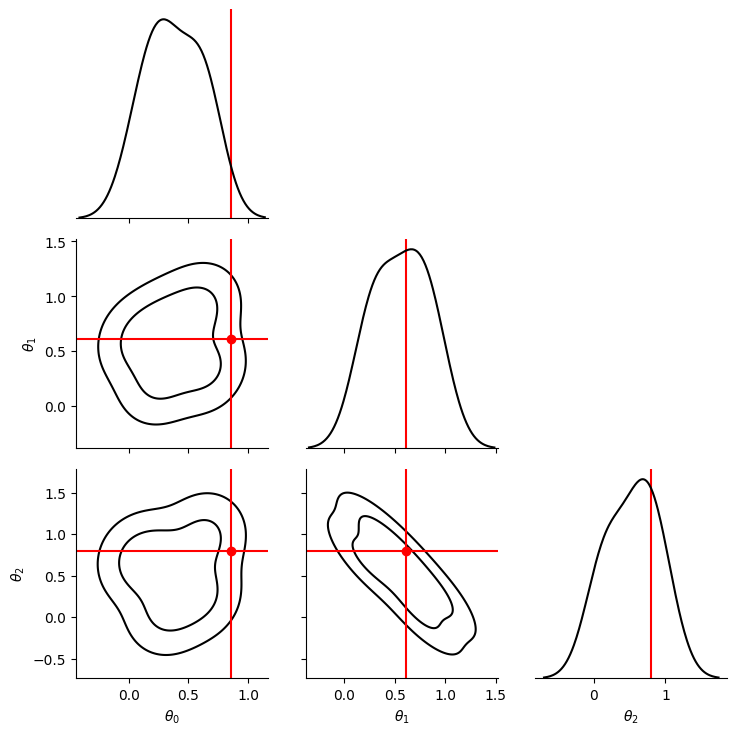

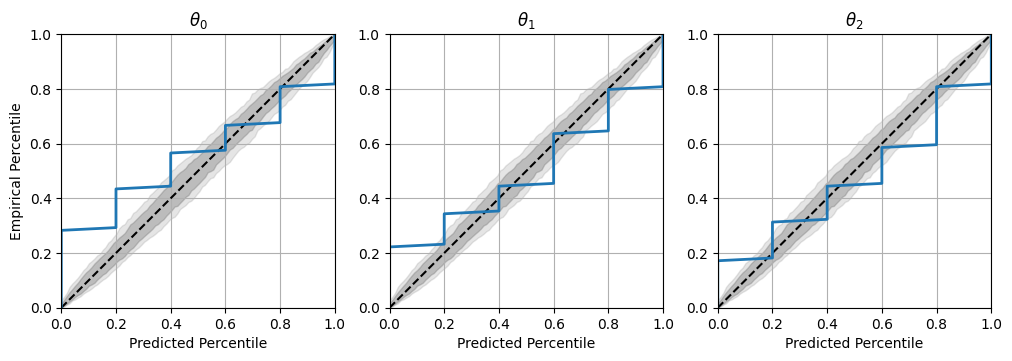

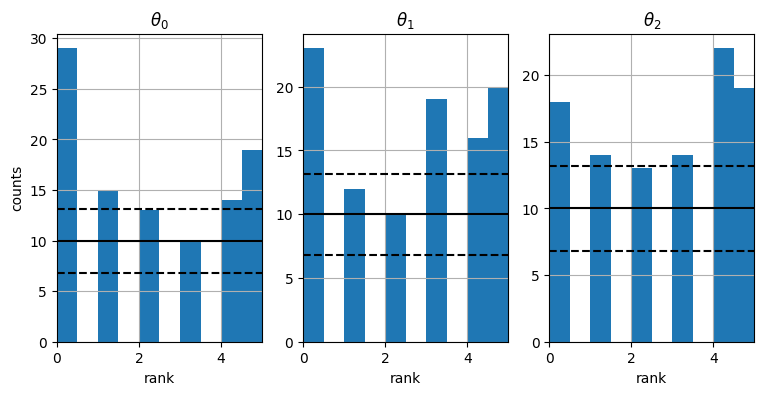

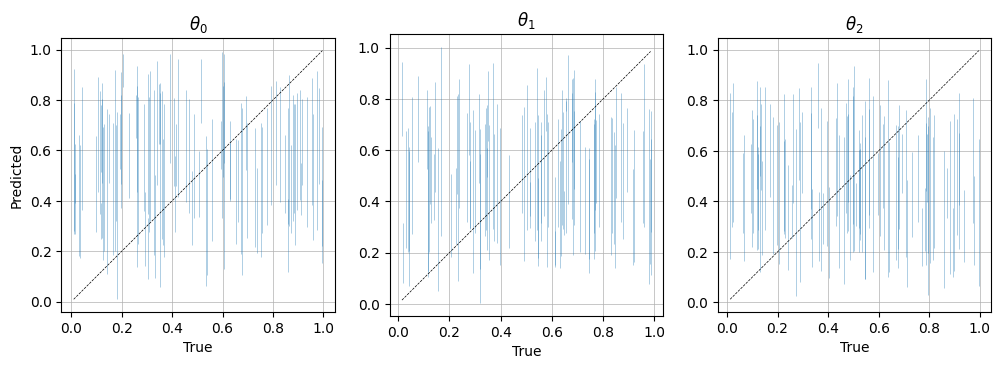

INFO:matplotlib.mathtext:Substituting symbol E from STIXNonUnicode


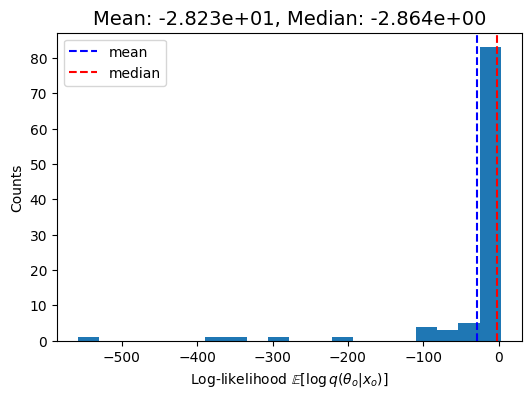

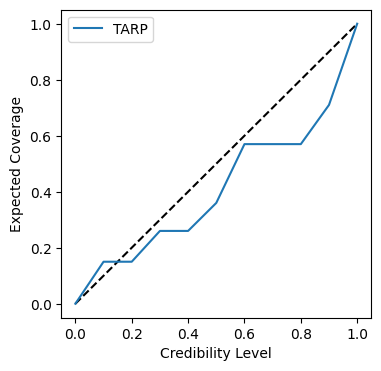

In [3]:
test_npe()

In [4]:
test_universal()

In [3]:
test_zuko()

In [4]:
test_yaml()

INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 2.

INFO:root:Training model 2 / 2.

INFO:root:It took 3.5568060874938965 seconds to train models.
INFO:root:Saving model to toy_lampe
INFO:root:MODEL INFERENCE CLASS: NPE
INFO:root:Training model 1 / 2.

INFO:root:Training model 2 / 2.

INFO:root:It took 4.457780122756958 seconds to train models.
INFO:root:Saving model to toy_lampe


TypeError: FCN.__init__() missing 1 required positional argument: 'n_input'